In [1]:
# ==== Imports ====
import re, json, time
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import (
    classification_report, f1_score, precision_recall_curve,
    average_precision_score, precision_recall_fscore_support,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.calibration import CalibratedClassifierCV  # NEW
from sklearn.base import clone  # NEW

try:
    from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
    HAS_ITERSTRAT = True
except Exception:
    HAS_ITERSTRAT = False

try:
    import lightgbm as lgb
    HAS_LGBM = True
except Exception:
    HAS_LGBM = False

pd.set_option("display.max_columns", 200)

In [2]:
IMG_ROOT = "InfractionPics"

Loading data …


<timed exec>:185: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:186: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


Shapes:
targets_raw: (17677, 14)
vision_bin : (17676, 641)
vision_scores: (17676, 641)
[anti-leak] Dropped columns: ['No Infraction']
Identified 10 label columns.
Merge mode: heuristic_id
Merged shape: (17676, 656)
y shape: (17676, 10)
Tabular matrix shape: (17676, 361) | features: 361
Vision PCA: 639 -> 118 components
Tabular pruning -> removed NZV: 0 | removed corr: 0
Tabular (post-prune) shape: (17676, 361)
[impute] Tabular non-finite -> 2021 values set to 0.0
Final X shape: (17676, 479) | tabular_dim: 361 | vision_dim: 118
Shapes | train: (11312, 479) val: (2828, 479) test: (3536, 479)
[health] tabular train: NaN=0, +Inf=0, -Inf=0 | labels NaN=0
[health] tabular val: NaN=0, +Inf=0, -Inf=0 | labels NaN=0
[health] tabular test: NaN=0, +Inf=0, -Inf=0 | labels NaN=0
RF search time: 719.77s | Best RF params: {'max_depth': 24, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 500} | micro-F1@0.5: 0.4003
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 

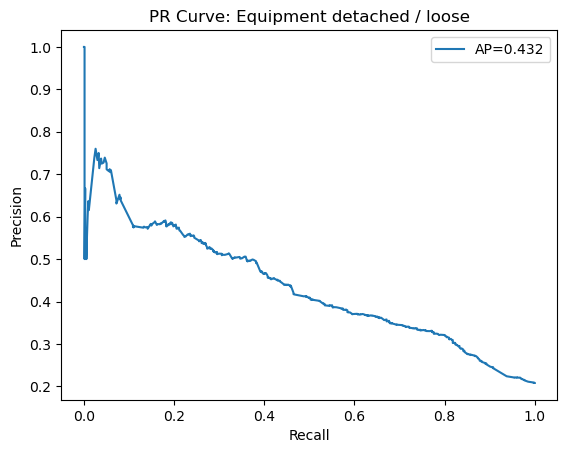

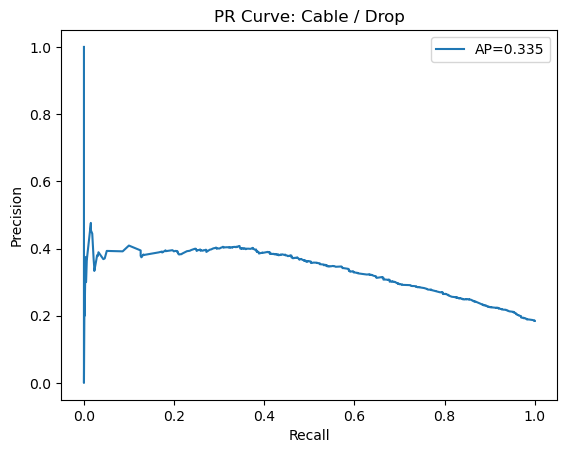

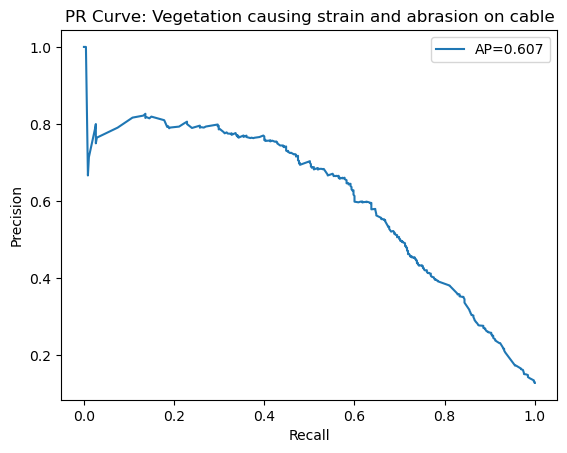

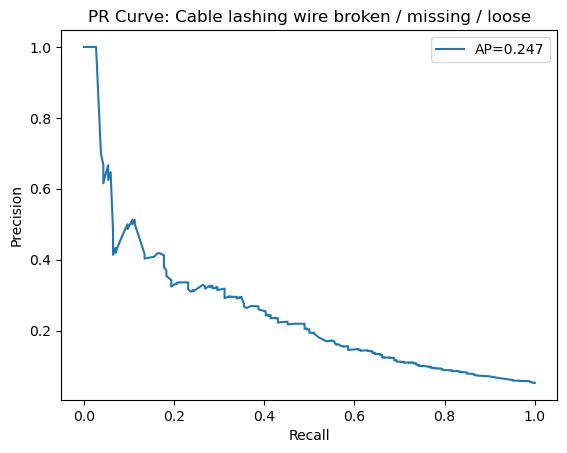

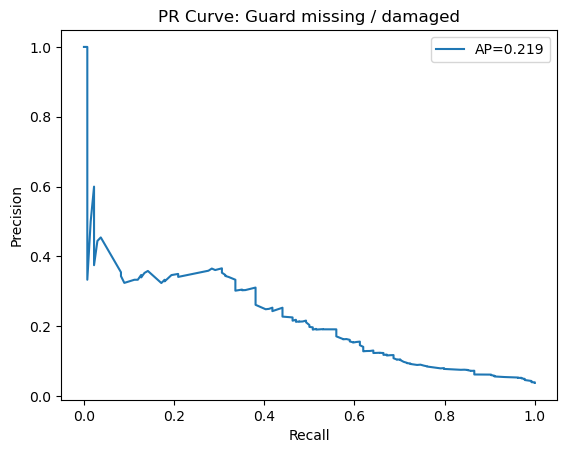

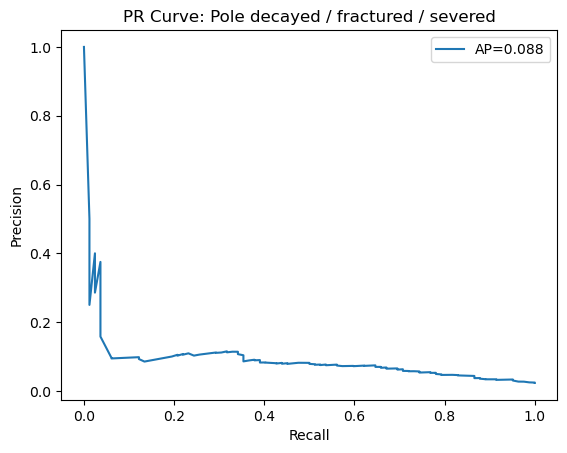

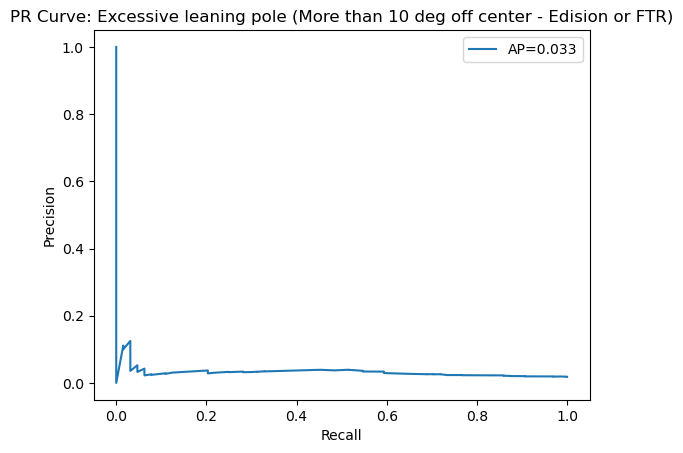

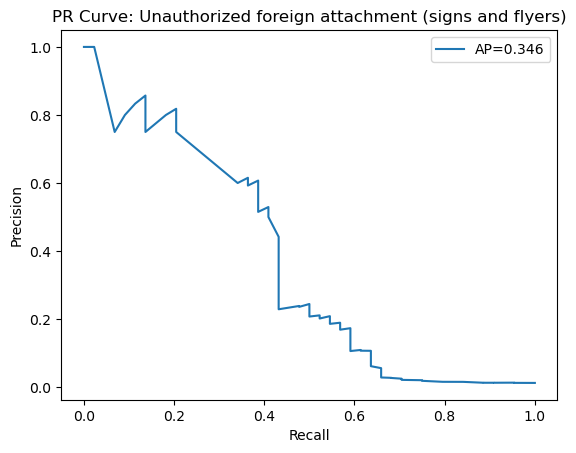

Saved artifacts -> ./artifacts_v3_2
Fusion exports -> ./fusion_v3_2
[images] All image paths resolved.
[health:tf] tabular train: NaN=0, +Inf=0, -Inf=0
[health:tf] tabular val: NaN=0, +Inf=0, -Inf=0
[health:tf] tabular test: NaN=0, +Inf=0, -Inf=0
Cause: Unable to locate the source code of <function _map_fn at 0x486aa9120>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function _map_fn at 0x486aa9120>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define th

2025-10-05 10:58:25.772857: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Allowed labels (auto-flag): []
Saved automation high-precision thresholds -> ./artifacts_v3_2/automation_thr_hi_v3_2.csv
[Fallback] No threshold achieves ≥90% sample-level precision on VAL; keep coverage at 0 for now.
thr_hi summary: {'count': 10.0, 'mean': 0.9499999999999998, 'std': 0.0, 'min': 0.95, '25%': 0.95, '50%': 0.95, '75%': 0.95, 'max': 0.95}
[AutoCalib] No threshold achieves ≥90% sample-level precision on VAL. Keeping AUTO_FLAG coverage at 0.
[AutoCalib] Saved -> ./artifacts_v3_2/automation_thr_hi_v3_2.csv
Automation policy report -> ./artifacts_v3_2/automation_policy_report_v3_2.json
{'target_precision': 0.9, 'val_estimates': {'auto_flag_sample_precision': None, 'auto_flag_label_precision': None, 'coverage': {'AUTO_FLAG': 0.0, 'AUTO_CLEAR': 0.0, 'REVIEW': 1.0}}, 'notes': {'min_val_positives_per_label': 5, 'abstain_margin': 0.02, 'auto_clear_max_prob': 0.08, 'allowed_labels': [], 'topk_at_decision': 3}}
Saved automation decisions (TEST) -> ./artifacts_v3_2/automation_decisio

2025-10-05 10:59:16.961318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


354/354 ━━━━━━━━━━━━━━━━━━━━ 198s 546ms/step - accuracy: 0.9167 - loss: 0.2641 - pr_auc: 0.1413 - recall: 0.0358 - roc_auc: 0.7334 - val_accuracy: 0.9309 - val_loss: 0.2111 - val_pr_auc: 0.2533 - val_recall: 0.0000e+00 - val_roc_auc: 0.8208 - learning_rate: 5.0000e-04
Epoch 2/3
354/354 ━━━━━━━━━━━━━━━━━━━━ 203s 572ms/step - accuracy: 0.9301 - loss: 0.2151 - pr_auc: 0.2276 - recall: 0.0084 - roc_auc: 0.8143 - val_accuracy: 0.9309 - val_loss: 0.2198 - val_pr_auc: 0.2269 - val_recall: 0.0000e+00 - val_roc_auc: 0.8022 - learning_rate: 5.0000e-04
Epoch 3/3
354/354 ━━━━━━━━━━━━━━━━━━━━ 198s 558ms/step - accuracy: 0.9297 - loss: 0.2128 - pr_auc: 0.2347 - recall: 0.0024 - roc_auc: 0.8202 - val_accuracy: 0.9301 - val_loss: 0.2244 - val_pr_auc: 0.2282 - val_recall: 0.0041 - val_roc_auc: 0.8002 - learning_rate: 5.0000e-04
Training fusion model — fine-tune …
Epoch 1/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9315 - loss: 0.2183 - pr_auc: 0.3040 - recall: 0.0818 - roc_auc: 0.8182
Epoc

2025-10-05 12:38:22.395706: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 12:39:14.896541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Saved TF-tuned thresholds -> ./artifacts_v3_2/best_thresholds_tf_v3_2.csv
[Fusion TF-tuned] Test Micro (P,R,F1): (0.5134, 0.6649, 0.5794)
[Fusion TF-tuned] Test Macro (P,R,F1): (0.5185, 0.5044, 0.4988)
[Fusion TF-tuned] Test Weighted F1: 0.5757
Saved fusion outputs -> ./artifacts_v3_2
Saved compare table -> ./artifacts_v3_2/compare_v3_2.csv
CPU times: user 12h 52min 36s, sys: 22h 30min 7s, total: 1d 11h 22min 43s
Wall time: 1h 57min 22s


In [2]:
%%time
#Utility Pole Infractions: Vision ✕ Tabular Pipeline (v3.2)
# ==== CONFIG ====
# --- Data sources ---
FEATURES_CSV_PATH = "Infraction_Features_Encoded_Reduced.csv"
VISION_BINARY_CSV_PATH = "vision_labels_binary.csv"
VISION_SCORES_CSV_PATH = "vision_labels_scores.csv"
# Optional mapping CSV with ['Name','filename'] if Name != filename (no .jpg)
MAPPING_CSV_PATH = None

# Optional: group split column (e.g., pole id)
GROUP_ID_COL = None

# Vision features
VISION_FEATURE_KIND = "scores"  # "scores" or "binary"
USE_VISION_PCA = True
PCA_VARIANCE_TO_RETAIN = 0.97

# Targets
DROP_NO_INFRACTION = True  # legacy toggle
NO_INFRACTION_KEYS = {"no infraction", "no_infractions", "no_infractions_present", "no_infraction"}
NO_INFRACTION_REGEX = r"^\s*no\s*[_\s-]*infractions?\s*$"

# Splitting
TEST_SIZE = 0.2
VAL_SIZE = 0.2   # fraction of TRAIN used for validation (HP & thresholds)
RANDOM_STATE = 42

# Models
RF_PARAM_GRID = {
    "n_estimators": [500, 700, 900],
    "max_depth": [None, 24, 36],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt", "log2"],
}
LGBM_ENABLE = True
LGBM_PARAM_GRID = {
    "n_estimators": [300, 500],
    "num_leaves": [63],
    "learning_rate": [0.1, 0.2],
    "min_child_samples": [10],
    "feature_fraction": [0.8, 1.0],
}
THRESH_GRID = [round(x, 2) for x in np.linspace(0.05, 0.80, 16)]
# Calibration & thresholding toggles (UPDATED)
CALIBRATE_PROBAS = True
CALIBRATION_METHOD = "isotonic"  # or "isotonic"
CALIBRATION_CV = 3
THRESH_OBJECTIVE = {"macro": 0.70, "micro": 0.30}
RARE_LABEL_WEIGHTING = False        # NEW: weight rare labels more in macro component
RARE_LABEL_WEIGHT_EXP = 0.5        # NEW: exponent for inverse-sqrt weighting (0.5 = sqrt)
COORD_ASCENT_MAX_PASSES = 3
PER_SAMPLE_TOPK = 2

# ==== Blending toggles (NEW) ====
BLEND_ENABLE = False
BLEND_ALPHA = 0.2  # blend = (1-ALPHA)*RF + ALPHA*LGBM

# ==== Threshold refinement toggles (NEW) ====
REFINE_THRESH_FINE = False
REFINE_FINE_RADIUS = 0.08
REFINE_FINE_STEP = 0.01             # NEW: if set to int K, keep at most K labels per sample after thresholding

# --- Tabular pruning ---
PRUNE_NZV = True
# Guardrail tweak: keep rare-but-real signals.
NZV_DOMINANT_PROP = 0.99995  # drop only if ≥ 99.995% of a single value (less aggressive than v3.1)
MIN_POS_FRAC = 0.001         # keep binary columns with ≥ 0.1% positives
MIN_POS_ABS = 25             # and at least 25 positives (dataset-size guard)

PRUNE_CORR = True
CORR_PRUNE_THRESHOLD = 0.98

# --- Outputs ---
ARTIFACT_DIR = "./artifacts_v3_2"
FUSION_EXPORTS_ENABLE = True
FUSION_EXPORT_DIR = "./fusion_v3_2"



# ==== Helpers ====
# Global Top-K helper to avoid NameError across cells
if 'apply_topk' not in globals():
    def apply_topk(y_scores: np.ndarray, y_pred: np.ndarray, k: int):
        if k is None or k <= 0:
            return y_pred
        # Keep only the top-k highest-probability labels per sample
        y_out = y_pred.copy()
        if y_out.ndim != 2:
            return y_out
        row_sums = y_out.sum(axis=1)
        too_many = np.where(row_sums > k)[0]
        for i in too_many:
            # sort descending by score for row i
            topk_idx = np.argsort(-y_scores[i])[:k]
            y_out[i, :] = 0
            y_out[i, topk_idx] = 1
        return y_out
def normalize_key(s):
    return str(s).strip().lower()

def guess_target_columns(df: pd.DataFrame) -> list:
    """Boolean columns except obvious non-target IDs and any No-Infraction variants."""
    non_target_like = {"name"} | NO_INFRACTION_KEYS
    bool_cols = [c for c in df.columns if df[c].dropna().isin([0,1,True,False]).all()]
    return [c for c in bool_cols if normalize_key(c) not in non_target_like and not re.match(NO_INFRACTION_REGEX, c, flags=re.I)]

def drop_no_infraction_everywhere(df: pd.DataFrame) -> pd.DataFrame:
    cols = [c for c in df.columns if normalize_key(c) in NO_INFRACTION_KEYS or re.match(NO_INFRACTION_REGEX, c, flags=re.I)]
    return df.drop(columns=cols) if cols else df

def join_datasets(targets_df, vision_df, id_map=None):
    tdf = targets_df.copy(); vdf = vision_df.copy()
    t_id_col = next((c for c in ["Name","name","id","pole_id"] if c in tdf.columns), None)
    v_id_col = next((c for c in ["filename","image","id"] if c in vdf.columns), None)

    if id_map is not None:
        map_df = id_map.copy()
        if not {"Name","filename"}.issubset(map_df.columns):
            raise ValueError("Mapping CSV must contain 'Name' and 'filename'.")
        map_df["Name_norm"], map_df["filename_norm"] = map_df["Name"].map(normalize_key), map_df["filename"].map(normalize_key)
        if t_id_col is None or v_id_col is None:
            raise ValueError("Missing ID columns for mapping.")
        tdf["Name_norm"], vdf["filename_norm"] = tdf[t_id_col].map(normalize_key), vdf[v_id_col].map(normalize_key)
        merged = (
            tdf.merge(map_df[["Name_norm","filename_norm"]], on="Name_norm", how="inner")
               .merge(vdf, on="filename_norm", how="inner")
        )
        return merged, t_id_col, v_id_col, "id_mapping"

    # Heuristic: Name equals filename without .jpg
    if t_id_col and v_id_col:
        vdf["vkey"] = vdf[v_id_col].astype(str).str.replace(".jpg","", regex=False).map(normalize_key)
        tdf["tkey"] = tdf[t_id_col].map(normalize_key)
        if len(set(tdf["tkey"]).intersection(set(vdf["vkey"]))) > 0:
            merged = tdf.merge(vdf, left_on="tkey", right_on="vkey", how="inner")
            return merged, t_id_col, v_id_col, "heuristic_id"

    # Fallback (discouraged)
    min_len = min(len(tdf), len(vdf))
    print(f"[WARN] Falling back to index alignment. Truncating to {min_len} rows.")
    aligned = pd.concat([tdf.iloc[:min_len].reset_index(drop=True), vdf.iloc[:min_len].reset_index(drop=True)], axis=1)
    return aligned, t_id_col, v_id_col, "index_fallback"

def multilabel_train_val_split(X, y, test_size=0.2, random_state=42, groups=None):
    if groups is not None:
        rng = np.random.RandomState(random_state)
        uniq = np.array(sorted(pd.Series(groups).astype(str).unique()))
        rng.shuffle(uniq)
        cut = int(len(uniq) * (1 - test_size))
        train_groups = set(uniq[:cut])
        mask = pd.Series(groups).astype(str).isin(train_groups)
        return X[mask], X[~mask], y[mask], y[~mask]
    if HAS_ITERSTRAT:
        msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
        idx = np.arange(X.shape[0])
        (tr, te), = msss.split(idx, y)
        return X[tr], X[te], y[tr], y[te]
    else:
        return train_test_split(X, y, test_size=test_size, random_state=random_state)

# ==== Helper: split indices (new) ====
def multilabel_train_val_split_idx(n_samples: int, y_mat: np.ndarray, test_size=0.2, random_state=42, groups=None):
    idx_all = np.arange(n_samples)
    if groups is not None:
        rng = np.random.RandomState(random_state)
        uniq = np.array(sorted(pd.Series(groups).astype(str).unique()))
        rng.shuffle(uniq)
        cut = int(len(uniq) * (1 - test_size))
        train_groups = set(uniq[:cut])
        mask = pd.Series(groups).astype(str).isin(train_groups).values
        tr = idx_all[mask]
        te = idx_all[~mask]
        return tr, te
    if HAS_ITERSTRAT:
        msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
        (tr, te), = msss.split(idx_all, y_mat)
        return tr, te
    else:
        tr, te = train_test_split(idx_all, test_size=test_size, random_state=random_state)
        return np.array(tr), np.array(te)

# ==== Load ====
print("Loading data …")
targets_raw = pd.read_csv(FEATURES_CSV_PATH)
vision_bin  = pd.read_csv(VISION_BINARY_CSV_PATH)
vision_scores = pd.read_csv(VISION_SCORES_CSV_PATH)
print("Shapes:")
print("targets_raw:", targets_raw.shape)
print("vision_bin :", vision_bin.shape)
print("vision_scores:", vision_scores.shape)
vision = vision_scores if VISION_FEATURE_KIND == "scores" else vision_bin
id_map = pd.read_csv(MAPPING_CSV_PATH) if MAPPING_CSV_PATH else None

# ==== Guardrail 1: strip No-Infraction everywhere (pre-labelling, pre-features) ====
if DROP_NO_INFRACTION:
    before_cols = set(targets_raw.columns)
    targets_raw = drop_no_infraction_everywhere(targets_raw)
    removed = sorted(list(before_cols - set(targets_raw.columns)))
    if removed:
        print("[anti-leak] Dropped columns:", removed)

# Labels (ensure No-Infraction is not auto-selected)
target_cols = guess_target_columns(targets_raw)
print(f"Identified {len(target_cols)} label columns.")

# ==== Merge ====
merged, t_id_col, v_id_col, merge_mode = join_datasets(targets_raw, vision, id_map=id_map)
print("Merge mode:", merge_mode)
print("Merged shape:", merged.shape)
assert merge_mode != "index_fallback", (
    "Merge fell back to index alignment. Provide MAPPING_CSV_PATH or ensure Name == filename (no .jpg)."
)

# Extra guard: assert no leaky No-Infraction cols survived merge
leaky_cols = [c for c in merged.columns if normalize_key(c) in NO_INFRACTION_KEYS or re.match(NO_INFRACTION_REGEX, c or "", flags=re.I)]
assert not leaky_cols, f"[anti-leak] Found leaky columns post-merge: {leaky_cols}"

# ==== Build y ====
y_cols = [c for c in target_cols if c in merged.columns]
y = merged[y_cols].astype(int).values
print("y shape:", y.shape)

# ==== Tabular features from targets_raw only (excluding current targets & IDs) ====
id_like = {"Name","Name_x","Name_y","tkey","vkey","filename","image","id","filename_norm"}
if t_id_col: id_like.add(t_id_col)
if v_id_col: id_like.add(v_id_col)

exclude_tab_targets = set(target_cols) | {"Name"} | {c for c in targets_raw.columns if re.match(NO_INFRACTION_REGEX, c, flags=re.I)}

tab_num_cols = [c for c in targets_raw.columns
                if c not in exclude_tab_targets and c in merged.columns and pd.api.types.is_numeric_dtype(targets_raw[c])]

tab_cat_cols = [c for c in targets_raw.columns
                if c not in exclude_tab_targets and c in merged.columns and (targets_raw[c].dtype == 'object') and (c not in id_like)]

X_tab_num = merged[tab_num_cols].values if len(tab_num_cols) else np.empty((len(merged), 0))
if len(tab_cat_cols):
    X_cat_in = merged[tab_cat_cols].astype(str)
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    X_tab_cat = ohe.fit_transform(X_cat_in)
    cat_names = list(ohe.get_feature_names_out(tab_cat_cols))
else:
    X_tab_cat = np.empty((len(merged), 0))
    cat_names = []

X_tab = np.concatenate([X_tab_num, X_tab_cat], axis=1) if (X_tab_num.size or X_tab_cat.size) else np.empty((len(merged), 0))
tab_feature_names = list(tab_num_cols) + cat_names
print("Tabular matrix shape:", X_tab.shape, "| features:", len(tab_feature_names))

# ==== Vision features ====
vision_id_like = {"filename", "image", "id", "vkey", "filename_norm"}
vision_cols = [c for c in merged.columns if c in vision.columns and c not in vision_id_like]
X_vision = merged[vision_cols].fillna(0.0).astype(float)
if USE_VISION_PCA:
    pca = PCA(n_components=PCA_VARIANCE_TO_RETAIN, svd_solver="full", random_state=RANDOM_STATE)
    X_vision_pca = pca.fit_transform(X_vision.values)
    print(f"Vision PCA: {X_vision.shape[1]} -> {X_vision_pca.shape[1]} components")
else:
    X_vision_pca = X_vision.values

# ==== Guardrail 2: Relaxed NZV pruning (tabular-only) ====
drop_nzv_idx = []
drop_corr_names = []

if PRUNE_NZV and X_tab.shape[1] > 0:
    n_rows = X_tab.shape[0]
    min_pos_needed = max(int(np.ceil(MIN_POS_FRAC * n_rows)), MIN_POS_ABS)
    keep_mask = np.ones(X_tab.shape[1], dtype=bool)

    for j in range(X_tab.shape[1]):
        col = X_tab[:, j]
        # Identify binary-ish columns (common for one-hots)
        finite_col = col[np.isfinite(col)]
        uniq = np.unique(finite_col)
        is_binaryish = set(np.round(uniq, 6)).issubset({0.0, 1.0}) or set(uniq).issubset({0, 1})

        # Dominant proportion like v3.1
        if finite_col.size == 0:
            dom_prop = 1.0
        else:
            vals, counts = np.unique(finite_col, return_counts=True)
            dom_prop = counts.max() / counts.sum()

        # Guardrail: keep sparse binary columns that have enough positives
        if dom_prop >= NZV_DOMINANT_PROP:
            if is_binaryish:
                pos = int(np.sum(finite_col > 0))
                if pos < min_pos_needed:
                    keep_mask[j] = False
            else:
                keep_mask[j] = False

    drop_nzv_idx = np.where(~keep_mask)[0].tolist()
    X_tab_nzv = X_tab[:, keep_mask]
    tab_names_nzv = [n for k, n in enumerate(tab_feature_names) if keep_mask[k]]
else:
    X_tab_nzv = X_tab
    tab_names_nzv = tab_feature_names

# Optional correlation pruning
if PRUNE_CORR and X_tab_nzv.shape[1] > 1:
    df_tmp = pd.DataFrame(X_tab_nzv, columns=tab_names_nzv)
    corr = df_tmp.corr(numeric_only=True).abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = set()
    pairs = upper.stack().sort_values(ascending=False)
    for (f1, f2), r in pairs.items():
        if r >= CORR_PRUNE_THRESHOLD and f1 not in to_drop and f2 not in to_drop:
            to_drop.add(f2)
    drop_corr_names = sorted(list(to_drop))
    keep2 = [n for n in tab_names_nzv if n not in to_drop]
    X_tab_pruned = df_tmp[keep2].values
    tab_names_pruned = keep2
else:
    X_tab_pruned = X_tab_nzv
    tab_names_pruned = tab_names_nzv

print(f"Tabular pruning -> removed NZV: {len(drop_nzv_idx)} | removed corr: {len(drop_corr_names)}")
print("Tabular (post-prune) shape:", X_tab_pruned.shape)
# Impute any non-finite values in tabular (prevents NaNs downstream in TF)
_nonfinite = ~np.isfinite(X_tab_pruned)
if _nonfinite.any():
    n_nf = int(_nonfinite.sum())
    print(f"[impute] Tabular non-finite -> {n_nf} values set to 0.0")
    X_tab_pruned = np.nan_to_num(X_tab_pruned, nan=0.0, posinf=0.0, neginf=0.0)

# Save pruning artifacts
Path(ARTIFACT_DIR).mkdir(exist_ok=True)
pd.DataFrame({"dropped_nzv_feature": [tab_feature_names[i] for i in drop_nzv_idx]}).to_csv(f"{ARTIFACT_DIR}/dropped_nzv_tabular_v3_2.csv", index=False)
if drop_corr_names:
    pd.DataFrame({"dropped_corr_feature": drop_corr_names}).to_csv(f"{ARTIFACT_DIR}/dropped_corr_tabular_v3_2.csv", index=False)
pd.DataFrame({"kept_tabular_feature": tab_names_pruned}).to_csv(f"{ARTIFACT_DIR}/kept_tabular_features_v3_2.csv", index=False)

# ==== Final X ====
# Safety: ensure no non-finite values before concatenation
X_tab_pruned = np.nan_to_num(X_tab_pruned, nan=0.0, posinf=0.0, neginf=0.0)
X = np.concatenate([X_tab_pruned, X_vision_pca], axis=1)
tabular_dim = X_tab_pruned.shape[1]
vision_dim = X_vision_pca.shape[1]
feature_names = [f"tabular:{n}" for n in tab_names_pruned] + [f"vision_pca_{i}" for i in range(vision_dim)]
print("Final X shape:", X.shape, "| tabular_dim:", tabular_dim, "| vision_dim:", vision_dim)

# ==== Split ====
groups = merged[GROUP_ID_COL].astype(str).values if GROUP_ID_COL and GROUP_ID_COL in merged.columns else None
n_samples = len(merged)
idx_all = np.arange(n_samples)

# First split: train_full vs test (indices)
idx_tr_full, idx_test = multilabel_train_val_split_idx(n_samples, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, groups=groups)
# Second split: train vs val within train_full
sub_tr, sub_val = multilabel_train_val_split_idx(len(idx_tr_full), y[idx_tr_full], test_size=VAL_SIZE, random_state=RANDOM_STATE, groups=None)
idx_tr = idx_tr_full[sub_tr]
idx_val = idx_tr_full[sub_val]

# Materialize arrays from indices
X_train_full, y_train_full = X[idx_tr_full], y[idx_tr_full]
X_test, y_test = X[idx_test], y[idx_test]
X_tr, y_tr = X[idx_tr], y[idx_tr]
X_val, y_val = X[idx_val], y[idx_val]

print("Shapes | train:", X_tr.shape, "val:", X_val.shape, "test:", X_test.shape)

# ---- Data health (pre-TF): non-finite counts in TABULAR per split ----
def _nonfinite_counts(arr: np.ndarray):
    return int(np.isnan(arr).sum()), int(np.isposinf(arr).sum()), int(np.isneginf(arr).sum())

for _name, _idx in [("train", idx_tr), ("val", idx_val), ("test", idx_test)]:
    _tab = X_tab_pruned[_idx] if X_tab_pruned.size else np.empty((len(_idx), 0))
    _nan, _pinf, _ninf = _nonfinite_counts(_tab)
    try:
        _y_nan = int(np.isnan(y[_idx]).sum())
    except Exception:
        _y_nan = 0
    print(f"[health] tabular {_name}: NaN={_nan}, +Inf={_pinf}, -Inf={_ninf} | labels NaN={_y_nan}")

# ==== Train RF (compact grid) ====
best_rf, best_rf_params, best_rf_f1 = None, None, -1.0
start = time.time()
for params in ParameterGrid(RF_PARAM_GRID):
    base = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced_subsample', **params)
    clf = MultiOutputClassifier(base, n_jobs=1)
    clf.fit(X_tr, y_tr)
    y_val_pred = clf.predict(X_val)
    f1 = f1_score(y_val, y_val_pred, average="micro", zero_division=0)
    if f1 > best_rf_f1:
        best_rf, best_rf_params, best_rf_f1 = clf, params, f1
rf_time = time.time() - start
print(f"RF search time: {rf_time:.2f}s | Best RF params: {best_rf_params} | micro-F1@0.5: {best_rf_f1:.4f}")

# ==== Train LightGBM OVR (compact grid + early stopping) ====
best_lgbm, best_lgbm_params, best_lgbm_f1 = None, None, -1.0
lgbm_time = 0.0
if LGBM_ENABLE and HAS_LGBM:
    from itertools import product
    start = time.time()
    keys = sorted(LGBM_PARAM_GRID.keys())
    grid = [dict(zip(keys, vals)) for vals in product(*[LGBM_PARAM_GRID[k] for k in keys])]
    for params in grid:
        ests = []
        for j in range(y_tr.shape[1]):
            # class-imbalance aware weight per label
            pos = float(np.sum(y_tr[:, j] == 1)); neg = float(len(y_tr) - pos)
            spw = (neg / max(pos, 1.0)) if pos > 0 else 1.0
            clf = lgb.LGBMClassifier(objective="binary", random_state=RANDOM_STATE, n_jobs=-1,
                                     scale_pos_weight=spw, **params)
            clf.fit(
                X_tr, y_tr[:, j],
                eval_set=[(X_val, y_val[:, j])],
                eval_metric="binary_logloss",
                callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
            )
            ests.append(clf)
        preds = np.column_stack([e.predict(X_val) for e in ests])
        micro = f1_score(y_val, preds, average="micro", zero_division=0)
        print("LGBM grid:", params, "-> micro-F1@0.5:", round(micro, 4))
        if micro > best_lgbm_f1:
            best_lgbm, best_lgbm_params, best_lgbm_f1 = ests, params, micro
    lgbm_time = time.time() - start
    print(f"LGBM search time: {lgbm_time:.2f}s | Best LGBM params: {best_lgbm_params} | micro-F1@0.5: {best_lgbm_f1:.4f}")
else:
    print("LightGBM disabled or not installed.")

# ==== Choose model & tune thresholds (with calibration & global objective) ====
# Validation-driven selection/tuning; final metrics reported on TEST.
use_model = "RF"
if best_lgbm is not None and best_lgbm_f1 >= best_rf_f1:
    use_model = "LGBM"

def rf_get_proba(est_list, X):
    return np.column_stack([est.predict_proba(X)[:, 1] for est in est_list])

# Build validation/test probabilities
# Always compute RF and LGBM probabilities when available, then optionally blend.
# RF raw
rf_proba_val_raw = rf_get_proba(best_rf.estimators_, X_val)
rf_proba_test_raw = rf_get_proba(best_rf.estimators_, X_test)

# RF calibrated (optional)
rf_proba_val_cal = rf_proba_test_cal = None
if CALIBRATE_PROBAS:
    def calibrate_estimators_rf(estimators, X, Y):
        cal_ests = []
        for j, est in enumerate(estimators):
            base = clone(est)
            try:
                cal = CalibratedClassifierCV(estimator=base, method=CALIBRATION_METHOD, cv=CALIBRATION_CV)
            except TypeError:
                cal = CalibratedClassifierCV(base_estimator=base, method=CALIBRATION_METHOD, cv=CALIBRATION_CV)
            cal.fit(X, Y[:, j])
            cal_ests.append(cal)
        return cal_ests
    cal_rf = calibrate_estimators_rf(best_rf.estimators_, X_tr, y_tr)
    rf_proba_val_cal = rf_get_proba(cal_rf, X_val)
    rf_proba_test_cal = rf_get_proba(cal_rf, X_test)

# LGBM probs (if trained & available)
lgbm_proba_val = lgbm_proba_test = None
if LGBM_ENABLE and HAS_LGBM and (best_lgbm is not None):
    lgbm_proba_val = np.column_stack([e.predict_proba(X_val)[:, 1] for e in best_lgbm])
    lgbm_proba_test = np.column_stack([e.predict_proba(X_test)[:, 1] for e in best_lgbm])

# Base probabilities for tuning/eval (before optional blend)
if use_model == "RF":
    base_val = rf_proba_val_cal if rf_proba_val_cal is not None else rf_proba_val_raw
    base_test = rf_proba_test_cal if rf_proba_test_cal is not None else rf_proba_test_raw
else:
    base_val = lgbm_proba_val if lgbm_proba_val is not None else rf_proba_val_cal or rf_proba_val_raw
    base_test = lgbm_proba_test if lgbm_proba_test is not None else rf_proba_test_cal or rf_proba_test_raw

# Optional late fusion (RF ⊕ LGBM)
if BLEND_ENABLE and (lgbm_proba_val is not None):
    rf_base_val = rf_proba_val_cal if rf_proba_val_cal is not None else rf_proba_val_raw
    rf_base_test = rf_proba_test_cal if rf_proba_test_cal is not None else rf_proba_test_raw
    if rf_base_val is not None:
        y_proba_val = (1 - BLEND_ALPHA) * rf_base_val + BLEND_ALPHA * lgbm_proba_val
        y_proba_test = (1 - BLEND_ALPHA) * rf_base_test + BLEND_ALPHA * lgbm_proba_test
    else:
        y_proba_val, y_proba_test = base_val, base_test
else:
    y_proba_val, y_proba_test = base_val, base_test

# Seed per-label thresholds on VALIDATION (maximize per-label F1)
best_thresholds = np.full(y_val.shape[1], 0.5, dtype=float)
for j in range(y_val.shape[1]):
    best_f1 = -1.0
    for t in THRESH_GRID:
        pred = (y_proba_val[:, j] >= t).astype(int)
        f1 = f1_score(y_val[:, j], pred, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1; best_thresholds[j] = t

# Global coordinate-ascent on VALIDATION
def blended_score(y_true, y_scores, thr_vec):
    pred = (y_scores >= thr_vec).astype(int)
    micro_f1 = f1_score(y_true, pred, average="micro", zero_division=0)
    if RARE_LABEL_WEIGHTING:
        per_label = f1_score(y_true, pred, average=None, zero_division=0)
        # Weighted macro using precomputed label_weights_norm
        macro_component = float(np.average(per_label, weights=label_weights_norm))
    else:
        macro_component = f1_score(y_true, pred, average="macro", zero_division=0)
    blend = THRESH_OBJECTIVE.get("macro", 0.85)*macro_component + THRESH_OBJECTIVE.get("micro", 0.15)*micro_f1
    return blend, micro_f1, macro_component

passes = 0; improved = True
while improved and passes < COORD_ASCENT_MAX_PASSES:
    improved = False; passes += 1
    for j in range(y_val.shape[1]):
        cur_best, _, _ = blended_score(y_val, y_proba_val, best_thresholds)
        cur_thr = best_thresholds[j]
        for t in THRESH_GRID:
            tmp = best_thresholds.copy(); tmp[j] = t
            score_t, _, _ = blended_score(y_val, y_proba_val, tmp)
            if score_t > cur_best + 1e-9:
                best_thresholds[j] = t
                cur_best = score_t
                improved = True

# Optional fine threshold refinement around current bests (VALIDATION)
if REFINE_THRESH_FINE:
    for j in range(y_val.shape[1]):
        t0 = best_thresholds[j]
        lo = max(0.0, t0 - REFINE_FINE_RADIUS)
        hi = min(1.0, t0 + REFINE_FINE_RADIUS)
        fine_grid = np.arange(lo, hi + 1e-9, REFINE_FINE_STEP)
        cur_best, _, _ = blended_score(y_val, y_proba_val, best_thresholds)
        best_t = t0
        for t in fine_grid:
            tmp = best_thresholds.copy(); tmp[j] = float(t)
            score_t, _, _ = blended_score(y_val, y_proba_val, tmp)
            if score_t > cur_best + 1e-9:
                cur_best = score_t; best_t = float(t)
        best_thresholds[j] = best_t

# Final predictions on TEST with tuned thresholds
y_pred_test = (y_proba_test >= best_thresholds).astype(int)

# Optional per-sample top-K enforcement (post-threshold)
if PER_SAMPLE_TOPK is not None:
    y_pred_test = apply_topk(y_proba_test, y_pred_test, int(PER_SAMPLE_TOPK))

micro = precision_recall_fscore_support(y_test, y_pred_test, average="micro", zero_division=0)
macro = precision_recall_fscore_support(y_test, y_pred_test, average="macro", zero_division=0)
weighted_f1 = f1_score(y_test, y_pred_test, average="weighted", zero_division=0)
print(f"Model used: {use_model} | Calibrated: {bool(use_model=='RF' and CALIBRATE_PROBAS)} | Blend: {BLEND_ALPHA if BLEND_ENABLE else 0} | CoordAscent passes: {passes} | Refine: {REFINE_THRESH_FINE} | TopK: {PER_SAMPLE_TOPK}")
print("Micro (P,R,F1):", tuple(round(x,4) for x in micro[:3]))
print("Macro (P,R,F1):", tuple(round(x,4) for x in macro[:3]))
print("Weighted F1:", round(weighted_f1,4))
# Save tuned thresholds for downstream TF inference
try:
    np.savetxt(f"{ARTIFACT_DIR}/best_thresholds_v3_2.csv", best_thresholds, delimiter=",")
    print("Saved thresholds ->", f"{ARTIFACT_DIR}/best_thresholds_v3_2.csv")
except Exception as e:
    print("[warn] Could not save thresholds:", e)

# ==== Ablation study (optional) ====
# Guards for notebook reruns: provide sane defaults if this cell is run in isolation
if 'ABLATION_ENABLE' not in globals():
    ABLATION_ENABLE = False
    ABLATION_TOPK = 2
    ABLATION_CONFIGS = [
        {"name": "base_nocal_nowt",    "calibrate": False, "rare_weighting": False, "topk": None, "objective": {"macro": 0.70, "micro": 0.30}},
        {"name": "cal_only",           "calibrate": True,  "rare_weighting": False, "topk": None, "objective": {"macro": 0.70, "micro": 0.30}},
        {"name": "cal_weighted",       "calibrate": True,  "rare_weighting": True,  "topk": None, "objective": {"macro": 0.85, "micro": 0.15}},
        {"name": "cal_weighted_topk2", "calibrate": True,  "rare_weighting": True,  "topk": 2,    "objective": {"macro": 0.85, "micro": 0.15}},
    ]
    ABLATION_REPORT_PATH = f"{ARTIFACT_DIR}/ablation_report_v3_2.csv"
# Ensure label weights exist
if 'label_weights_norm' not in globals():
    try:
        _eps = 1e-9
        _ls = y_tr.sum(axis=0).astype(float)
        _lf = _ls / max(1, y_tr.shape[0])
        _inv_sqrt = 1.0 / np.sqrt(np.maximum(_lf, _eps))
        label_weights = _inv_sqrt ** (RARE_LABEL_WEIGHT_EXP if 'RARE_LABEL_WEIGHT_EXP' in globals() else 0.5)
        label_weights_norm = label_weights / (label_weights.mean() if label_weights.mean() > 0 else 1.0)
    except Exception:
        label_weights_norm = np.ones(y_val.shape[1], dtype=float)
# Ensure apply_topk exists
if 'apply_topk' not in globals():
    def apply_topk(y_scores, y_pred, k: int):
        if k is None or k <= 0:
            return y_pred
        y_out = y_pred.copy()
        row_sums = y_out.sum(axis=1)
        too_many = np.where(row_sums > k)[0]
        for i in too_many:
            idx = np.argsort(-y_scores[i])[:k]
            y_out[i, :] = 0
            y_out[i, idx] = 1
        return y_out

if ABLATION_ENABLE:
    import pandas as pd

    def tune_thresholds_val(y_true_val, proba_val, objective, use_rare_weighting, grid, max_passes):
        # seed per-label F1 thresholds
        thr = np.full(y_true_val.shape[1], 0.5, dtype=float)
        for j in range(y_true_val.shape[1]):
            best_f1 = -1.0
            for t in grid:
                pred = (proba_val[:, j] >= t).astype(int)
                f1 = f1_score(y_true_val[:, j], pred, zero_division=0)
                if f1 > best_f1:
                    best_f1 = f1; thr[j] = t
        # coordinate ascent on blended score
        def blended_local(y_true, y_scores, thr_vec, objective, use_weights):
            pred = (y_scores >= thr_vec).astype(int)
            micro_f1 = f1_score(y_true, pred, average="micro", zero_division=0)
            if use_weights:
                per_label = f1_score(y_true, pred, average=None, zero_division=0)
                macro_component = float(np.average(per_label, weights=label_weights_norm))
            else:
                macro_component = f1_score(y_true, pred, average="macro", zero_division=0)
            blend = objective.get("macro", 0.85)*macro_component + objective.get("micro", 0.15)*micro_f1
            return blend, micro_f1, macro_component
        passes = 0; improved = True
        while improved and passes < max_passes:
            improved = False; passes += 1
            for j in range(y_true_val.shape[1]):
                cur_best, _, _ = blended_local(y_true_val, proba_val, thr, objective, use_rare_weighting)
                for t in grid:
                    tmp = thr.copy(); tmp[j] = t
                    score_t, _, _ = blended_local(y_true_val, proba_val, tmp, objective, use_rare_weighting)
                    if score_t > cur_best + 1e-9:
                        thr[j] = t
                        cur_best = score_t
                        improved = True
        return thr

    def metrics_from_pred(y_true, y_scores, thr_vec, topk=None):
        pred = (y_scores >= thr_vec).astype(int)
        if topk is not None:
            pred = apply_topk(y_scores, pred, int(topk))
        p, r, f, _ = precision_recall_fscore_support(y_true, pred, average="micro", zero_division=0)
        mic = (p, r, f)
        mac = precision_recall_fscore_support(y_true, pred, average="macro", zero_division=0)
        wF1 = f1_score(y_true, pred, average="weighted", zero_division=0)
        return mic, mac, wF1

    rows = []
    if use_model == "RF":
        for cfg in ABLATION_CONFIGS:
            # select proba set
            proba_val_cfg = rf_proba_val_cal if cfg["calibrate"] and rf_proba_val_cal is not None else rf_proba_val_raw
            proba_test_cfg = rf_proba_test_cal if cfg["calibrate"] and rf_proba_test_cal is not None else rf_proba_test_raw
            if proba_val_cfg is None or proba_test_cfg is None:
                continue
            thr_vec = tune_thresholds_val(y_val, proba_val_cfg, cfg["objective"], cfg["rare_weighting"], THRESH_GRID, COORD_ASCENT_MAX_PASSES)
            mic_val, mac_val, _ = metrics_from_pred(y_val, proba_val_cfg, thr_vec, topk=cfg.get("topk"))
            mic_test, mac_test, wf1_test = metrics_from_pred(y_test, proba_test_cfg, thr_vec, topk=cfg.get("topk"))
            rows.append({
                "config": cfg["name"],
                "calibrate": cfg["calibrate"],
                "rare_weighting": cfg["rare_weighting"],
                "topk": cfg.get("topk"),
                "obj_macro": cfg["objective"]["macro"],
                "obj_micro": cfg["objective"]["micro"],
                "val_micro_P": round(mic_val[0],4), "val_micro_R": round(mic_val[1],4), "val_micro_F1": round(mic_val[2],4),
                "val_macro_P": round(mac_val[0],4), "val_macro_R": round(mac_val[1],4), "val_macro_F1": round(mac_val[2],4),
                "test_micro_P": round(mic_test[0],4), "test_micro_R": round(mic_test[1],4), "test_micro_F1": round(mic_test[2],4),
                "test_macro_P": round(mac_test[0],4), "test_macro_R": round(mac_test[1],4), "test_macro_F1": round(mac_test[2],4),
                "test_weighted_F1": round(wf1_test,4),
            })
        if rows:
            abldf = pd.DataFrame(rows)
            abldf.to_csv(ABLATION_REPORT_PATH, index=False)
            print("Ablation report saved ->", ABLATION_REPORT_PATH)
            try:
                from caas_jupyter_tools import display_dataframe_to_user
                display_dataframe_to_user("Ablation Report (v3.2)", abldf)
            except Exception:
                pass
    else:
        print("[Ablation] Skipped (model is LGBM; calibration toggle not applicable).")

# ==== PR Curves for top labels by support ====
import matplotlib.pyplot as plt
supports = pd.Series(y_tr.sum(axis=0), index=y_cols).sort_values(ascending=False)
top_labels = supports.index[:min(8, len(supports))]
for label in top_labels:
    j = list(y_cols).index(label)
    # Use TEST set curves, since thresholds and model were chosen without using TEST
    precision, recall, _ = precision_recall_curve(y_test[:, j], y_proba_test[:, j])
    ap = average_precision_score(y_test[:, j], y_proba_test[:, j])
    plt.figure()
    plt.plot(recall, precision, label=f"AP={ap:.3f}")
    plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title(f"PR Curve: {label}")
    plt.legend(loc="best")
plt.show()

# ==== Feature Importances (global & per-label) ====
Path(ARTIFACT_DIR).mkdir(exist_ok=True)
if use_model == "RF" and 'best_rf' in globals() and best_rf is not None:
    importances = []
    for label, est in zip(y_cols, best_rf.estimators_):
        if hasattr(est, "feature_importances_"):
            s = pd.Series(est.feature_importances_, index=feature_names, name=label).sort_values(ascending=False).head(50)
            df = s.reset_index().rename(columns={"index":"feature", label:"importance"})
            df["label"] = label
            importances.append(df)
    if importances:
        feat_imp_per_label = pd.concat(importances, ignore_index=True)
        global_imp = feat_imp_per_label.groupby("feature")["importance"].mean().sort_values(ascending=False)
        global_imp.reset_index(name="mean_importance").to_csv(f"{ARTIFACT_DIR}/feature_importance_global_v3_2.csv", index=False)
        feat_imp_per_label.to_csv(f"{ARTIFACT_DIR}/feature_importance_per_label_top50_v3_2.csv", index=False)
elif use_model == "LGBM" and best_lgbm is not None:
    importances = []
    for label, est in zip(y_cols, best_lgbm):
        try:
            gain = est.booster_.feature_importance(importance_type='gain')
            names = np.array(feature_names)
            s = pd.Series(gain, index=names, name=label).sort_values(ascending=False).head(50)
            df = s.reset_index().rename(columns={"index":"feature", label:"importance"})
            df["label"] = label
            importances.append(df)
        except Exception:
            pass
    if importances:
        feat_imp_per_label = pd.concat(importances, ignore_index=True)
        global_imp = feat_imp_per_label.groupby("feature")["importance"].mean().sort_values(ascending=False)
        global_imp.reset_index(name="mean_importance").to_csv(f"{ARTIFACT_DIR}/feature_importance_global_v3_2.csv", index=False)
        feat_imp_per_label.to_csv(f"{ARTIFACT_DIR}/feature_importance_per_label_top50_v3_2.csv", index=False)

# ==== Save core artifacts ====
Path(ARTIFACT_DIR).mkdir(exist_ok=True)
np.save(f"{ARTIFACT_DIR}/X_train_v3_2.npy", X_tr)
np.save(f"{ARTIFACT_DIR}/X_val_v3_2.npy", X_val)
np.save(f"{ARTIFACT_DIR}/X_test_v3_2.npy", X_test)
np.save(f"{ARTIFACT_DIR}/y_train_v3_2.npy", y_tr)
np.save(f"{ARTIFACT_DIR}/y_val_v3_2.npy", y_val)
np.save(f"{ARTIFACT_DIR}/y_test_v3_2.npy", y_test)
pd.Series(y_cols).to_csv(f"{ARTIFACT_DIR}/label_names_v3_2.csv", index=False, header=False)
pd.Series(feature_names).to_csv(f"{ARTIFACT_DIR}/feature_names_v3_2.csv", index=False, header=False)
# New: save split indices relative to fused row order
pd.Series(idx_tr).to_csv(f"{ARTIFACT_DIR}/train_indices_v3_2.csv", index=False, header=False)
pd.Series(idx_val).to_csv(f"{ARTIFACT_DIR}/val_indices_v3_2.csv", index=False, header=False)
pd.Series(idx_test).to_csv(f"{ARTIFACT_DIR}/test_indices_v3_2.csv", index=False, header=False)

# ==== Fusion-ready tabular block export ====
if FUSION_EXPORTS_ENABLE:
    Path(FUSION_EXPORT_DIR).mkdir(exist_ok=True)
    # 1) aligned identity index to join with images during TF pipeline
    id_cols = []
    for c in ["row_idx", "Name", "filename", "tkey", "vkey"]:
        if c in merged.columns:
            id_cols.append(c)
    idx_df = pd.DataFrame({"row_idx": np.arange(len(merged))})
    for c in ["Name", "filename", "tkey", "vkey"]:
        if c in merged.columns:
            idx_df[c] = merged[c]
    idx_df.to_csv(f"{FUSION_EXPORT_DIR}/fusion_index_v3_2.csv", index=False)

    # 2) tabular block (kept/pruned) + names
    np.save(f"{FUSION_EXPORT_DIR}/tabular_block_v3_2.npy", X_tab_pruned)
    pd.Series(tab_names_pruned).to_csv(f"{FUSION_EXPORT_DIR}/tabular_block_feature_names_v3_2.csv", index=False, header=False)

    # 3) vision PCA (optional, if you want to pre-stage alongside images)
    np.save(f"{FUSION_EXPORT_DIR}/vision_pca_block_v3_2.npy", X_vision_pca)

    # 4) labels for ALL rows (aligned to fusion_index)
    np.save(f"{FUSION_EXPORT_DIR}/y_all_v3_2.npy", y)

    # 5) split indices for TF dataset construction (relative to fusion_index rows)
    pd.Series(idx_tr).to_csv(f"{FUSION_EXPORT_DIR}/train_indices_v3_2.csv", index=False, header=False)
    pd.Series(idx_val).to_csv(f"{FUSION_EXPORT_DIR}/val_indices_v3_2.csv", index=False, header=False)
    pd.Series(idx_test).to_csv(f"{FUSION_EXPORT_DIR}/test_indices_v3_2.csv", index=False, header=False)

    # 6) small manifest for sanity
    manifest = {
        "tabular_dim": int(tabular_dim),
        "vision_dim": int(vision_dim),
        "n_rows": int(len(merged)),
        "y_labels": list(map(str, y_cols)),
        "grid": {"rf": RF_PARAM_GRID, "lgbm": LGBM_PARAM_GRID},
        "nzv": {"NZV_DOMINANT_PROP": NZV_DOMINANT_PROP, "MIN_POS_FRAC": MIN_POS_FRAC, "MIN_POS_ABS": MIN_POS_ABS},
        "splits": {"train": len(idx_tr), "val": len(idx_val), "test": len(idx_test)}
    }
    with open(f"{FUSION_EXPORT_DIR}/manifest_v3_2.json", "w") as f:
        json.dump(manifest, f, indent=2)

print("Saved artifacts ->", ARTIFACT_DIR)
print("Fusion exports ->", FUSION_EXPORT_DIR if FUSION_EXPORTS_ENABLE else "(disabled)")


# ==== TensorFlow fusion loader (images ⊕ tabular) ====
# Ready-to-run TF input pipeline: decode → resize → (optional) augment → batch → prefetch
# Configure IMG_ROOT to your image directory before running this cell.
try:
    import tensorflow as tf
except Exception as e:
    print("[TF Loader] TensorFlow not available in this environment:", e)

# --- Config ---
IMG_ROOT = "InfractionPics"
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
BATCH_SIZE = 32
AUGMENT_ENABLE = True
CACHE_IN_MEMORY = True
NUM_PARALLEL = tf.data.AUTOTUNE if 'tf' in globals() else None
IMG_ID_COLS = ["filename", "Name", "tkey", "vkey"]  # auto-detect which column to use
IMG_EXT_DEFAULT = ".jpg"  # appended if the chosen id column lacks an extension
# Missing image handling
MISSING_IMAGE_POLICY = "skip"   # one of {"skip", "placeholder", "error"}
CANDIDATE_EXTS = [".jpg", ".JPG", ".jpeg", ".png"]

# --- Load fusion artifacts (aligned 1:1 with rows) ---
import os

fusion_index_path = f"{FUSION_EXPORT_DIR}/fusion_index_v3_2.csv"
if not os.path.exists(fusion_index_path):
    raise FileNotFoundError(f"Missing {fusion_index_path}. Re-run fusion export.")

fusion_idx = pd.read_csv(fusion_index_path)
img_id_col = next((c for c in IMG_ID_COLS if c in fusion_idx.columns), None)
if img_id_col is None:
    raise ValueError(f"None of {IMG_ID_COLS} found in fusion_index_v3_2.csv")

# Build image paths with extension resolution and existence checks
from os.path import basename, splitext

def _resolve_path(name: str) -> str:
    name = str(name)
    # If extension missing, try candidates in order
    if "." not in basename(name):
        for ext in CANDIDATE_EXTS:
            cand = os.path.join(IMG_ROOT, name + ext)
            if os.path.exists(cand):
                return cand
        return os.path.join(IMG_ROOT, name + IMG_EXT_DEFAULT)
    # If has extension but file missing, try alternate common extensions
    p = os.path.join(IMG_ROOT, name)
    if os.path.exists(p):
        return p
    base, _ext = splitext(name)
    for ext in CANDIDATE_EXTS:
        cand = os.path.join(IMG_ROOT, base + ext)
        if os.path.exists(cand):
            return cand
    return p

img_names = fusion_idx[img_id_col].astype(str).values
img_paths = np.array([_resolve_path(n) for n in img_names])
exists_mask = np.array([os.path.exists(p) for p in img_paths])
missing_ct = int((~exists_mask).sum())
if missing_ct > 0:
    print(f"[images] Missing files: {missing_ct} (policy={MISSING_IMAGE_POLICY})")
    # show a few examples
    miss_idx = np.where(~exists_mask)[0][:5]
    for i in miss_idx:
        print("  -", img_paths[i])
else:
    print("[images] All image paths resolved.")

# Tabular + labels blocks
X_tab_all = np.load(f"{FUSION_EXPORT_DIR}/tabular_block_v3_2.npy")
# Impute non-finite values to keep TF stable
X_tab_all = np.nan_to_num(X_tab_all, nan=0.0, posinf=0.0, neginf=0.0)
y_all = np.load(f"{FUSION_EXPORT_DIR}/y_all_v3_2.npy")

# Indices for splits
idx_train = pd.read_csv(f"{FUSION_EXPORT_DIR}/train_indices_v3_2.csv", header=None, names=["idx"])['idx'].to_numpy()
idx_val   = pd.read_csv(f"{FUSION_EXPORT_DIR}/val_indices_v3_2.csv", header=None, names=["idx"])['idx'].to_numpy()
idx_test  = pd.read_csv(f"{FUSION_EXPORT_DIR}/test_indices_v3_2.csv", header=None, names=["idx"])['idx'].to_numpy()

# ---- Data health (TF loader): non-finite counts in TABULAR per split ----
try:
    def _nf_counts(arr):
        return int(np.isnan(arr).sum()), int(np.isposinf(arr).sum()), int(np.isneginf(arr).sum())
    for _name, _idx in [("train", idx_train), ("val", idx_val), ("test", idx_test)]:
        _tab = X_tab_all[_idx]
        _nan, _pinf, _ninf = _nf_counts(_tab)
        print(f"[health:tf] tabular {_name}: NaN={_nan}, +Inf={_pinf}, -Inf={_ninf}")
except Exception as _e:
    print("[health:tf] (skipped)", _e)

# --- TF parsing & augmentation ---
if 'tf' in globals():
    def _load_image(path):
        img = tf.io.read_file(path)
        # decode_image handles JPG/PNG; set channels
        img = tf.io.decode_image(img, channels=IMG_CHANNELS, expand_animations=False)
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
        return img

    def _augment(img):
        if not AUGMENT_ENABLE:
            return img
        # Lightweight, safe augmentations
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_brightness(img, max_delta=0.05)
        img = tf.image.random_contrast(img, lower=0.9, upper=1.1)
        # gentle geometric augs
        try:
            _rot = getattr(tf.keras.layers, "RandomRotation")(0.02)
            _zoom = getattr(tf.keras.layers, "RandomZoom")(0.05, 0.05)
            img = _rot(img, training=True)
            img = _zoom(img, training=True)
        except Exception:
            pass
        return tf.clip_by_value(img, 0.0, 1.0)

    def _map_fn(path, tab, label):
        img = _load_image(path)
        img = _augment(img)
        tab = tf.cast(tab, tf.float32)
        tab = tf.where(tf.math.is_finite(tab), tab, tf.zeros_like(tab))
        features = {"image": img, "tabular": tab}
        label = tf.cast(label, tf.float32)
        return features, label

    def _map_fn_with_ok(path, tab, label, ok):
        img = tf.cond(
            ok,
            lambda: _load_image(path),
            lambda: tf.zeros([IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS], dtype=tf.float32),
        )
        img = _augment(img)
        tab = tf.cast(tab, tf.float32)
        tab = tf.where(tf.math.is_finite(tab), tab, tf.zeros_like(tab))
        features = {"image": img, "tabular": tab}
        label = tf.cast(label, tf.float32)
        return features, label

    def make_ds(indices, shuffle=True):
        sel_paths = img_paths[indices]
        sel_tab = X_tab_all[indices]
        sel_y = y_all[indices]
        sel_ok = exists_mask[indices]

        if MISSING_IMAGE_POLICY == "skip":
            keep = sel_ok
            if keep.ndim != 1:
                keep = keep.reshape(-1)
            sel_paths, sel_tab, sel_y = sel_paths[keep], sel_tab[keep], sel_y[keep]
            ds = tf.data.Dataset.from_tensor_slices((sel_paths, sel_tab, sel_y))
            map_fn = _map_fn
        elif MISSING_IMAGE_POLICY == "placeholder":
            ds = tf.data.Dataset.from_tensor_slices((sel_paths, sel_tab, sel_y, sel_ok))
            map_fn = _map_fn_with_ok
        else:  # "error"
            # let TF raise if a file is missing
            ds = tf.data.Dataset.from_tensor_slices((sel_paths, sel_tab, sel_y))
            map_fn = _map_fn

        if CACHE_IN_MEMORY:
            ds = ds.cache()
        if shuffle:
            ds = ds.shuffle(buffer_size=len(indices), reshuffle_each_iteration=True)
        ds = ds.map(map_fn, num_parallel_calls=NUM_PARALLEL)
        ds = ds.batch(BATCH_SIZE, drop_remainder=False)
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Build datasets
    ds_train = make_ds(idx_train, shuffle=True)
    ds_val   = make_ds(idx_val, shuffle=False)
    ds_test  = make_ds(idx_test, shuffle=False)

    print("TF datasets ready:")
    # Preview shapes WITHOUT touching cached datasets to avoid tf.data cache warnings
    def _preview_no_cache(indices, name):
        try:
            sel_indices = indices[:BATCH_SIZE]
            sel_paths = img_paths[sel_indices]
            sel_tab = X_tab_all[sel_indices]
            sel_y = y_all[sel_indices]
            sel_ok = exists_mask[sel_indices]
            if MISSING_IMAGE_POLICY == "skip":
                keep = sel_ok
                sel_paths, sel_tab, sel_y = sel_paths[keep], sel_tab[keep], sel_y[keep]
                ds_prev = tf.data.Dataset.from_tensor_slices((sel_paths, sel_tab, sel_y)).map(_map_fn, num_parallel_calls=NUM_PARALLEL)
            elif MISSING_IMAGE_POLICY == "placeholder":
                ds_prev = tf.data.Dataset.from_tensor_slices((sel_paths, sel_tab, sel_y, sel_ok)).map(_map_fn_with_ok, num_parallel_calls=NUM_PARALLEL)
            else:
                ds_prev = tf.data.Dataset.from_tensor_slices((sel_paths, sel_tab, sel_y)).map(_map_fn, num_parallel_calls=NUM_PARALLEL)
            ds_prev = ds_prev.batch(BATCH_SIZE, drop_remainder=False)
            b = next(iter(ds_prev.take(1)))
            x, y = b
            print(f"  {name}: batch image {x['image'].shape}, tabular {x['tabular'].shape}, labels {y.shape}")
        except Exception as e:
            print(f"  {name}: (inspect in your session) ->", e)
        except Exception as e:
            print(f"  {name}: (inspect in your session) ->", e)
    _preview_no_cache(idx_train, "train")
    _preview_no_cache(idx_val, "val")
    _preview_no_cache(idx_test, "test")
else:
    print("[TF Loader] Skipped building tf.data datasets (TensorFlow not imported)")


# ==== Compact Fusion Model (EfficientNetB0 ⊕ Tabular MLP) ====
# Builds a two-tower model, compiles with BCE + PR/ROC AUC + recall/accuracy,
# then runs inference on ds_val/ds_test and applies TF-tuned thresholds.

try:
    import tensorflow as tf
    from tensorflow.keras import layers as KL
except Exception as e:
    print("[Fusion Model] TensorFlow missing:", e)

EFFNET_WEIGHTS = "imagenet"   # use pretrained weights for stronger visual prior
TAB_DIM = int(X_tab_all.shape[1])
NUM_LABELS = int(y_all.shape[1])
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
LR = 1e-3
EPOCHS = 20

# TF-side threshold tuning toggles (NEW)
TF_TUNE_THRESH = True
TF_THRESH_GRID = [round(x, 2) for x in np.linspace(0.05, 0.80, 16)]
TF_COORD_ASCENT_MAX_PASSES = 3
TF_THRESH_OBJECTIVE = {"macro": 0.80, "micro": 0.20}
TF_RARE_LABEL_WEIGHTING = True  # use inverse-sqrt freq if True
TF_PER_SAMPLE_TOPK = 3  # allow up to 3 labels per sample on TF inference

if 'tf' in globals():
    def build_fusion_model(img_shape=IMG_SHAPE, tab_dim=TAB_DIM, n_labels=NUM_LABELS,
                           effnet_weights=EFFNET_WEIGHTS):
        from tensorflow.keras.regularizers import l2
        reg = l2(1e-5)
        # Image tower
        base = tf.keras.applications.EfficientNetB0(
            include_top=False, weights=effnet_weights, input_shape=img_shape, pooling="avg"
        )
        img_in = KL.Input(shape=img_shape, name="image")
        x_img = base(img_in)
        x_img = KL.Dense(256, activation="relu", kernel_regularizer=reg)(x_img)

        # Tabular tower
        tab_in = KL.Input(shape=(tab_dim,), name="tabular")
        x_tab = KL.BatchNormalization()(tab_in)
        x_tab = KL.Dense(256, activation="relu", kernel_regularizer=reg)(x_tab)
        x_tab = KL.Dense(128, activation="relu", kernel_regularizer=reg)(x_tab)

        # Fuse
        x = KL.Concatenate()([x_img, x_tab])
        x = KL.Dense(256, activation="relu", kernel_regularizer=reg)(x)
        x = KL.Dropout(0.3)(x)
        out = KL.Dense(n_labels, activation="sigmoid", name="out")(x)
        model = tf.keras.Model(inputs={"image": img_in, "tabular": tab_in}, outputs=out)
        return model, base

    model, base_backbone = build_fusion_model()


# ==== Automation Policy — High-Precision Autopilot (v3.2) ====
# Push toward safe automation: tune per-label thresholds for a target PRECISION
# and add a 3-way decision: AUTO_FLAG / AUTO_CLEAR / REVIEW.

import os, json, numpy as np, pandas as pd
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support

# --- Config (surgical, low-risk defaults) ---
AUTOMATE_ENABLE = True
AUTO_PRECISION_TARGET = 0.90       # target PPV for auto-flag (per label, validated)
AUTO_MIN_VAL_POS = 5               # skip precision tuning for labels with too few positives on VAL
AUTO_TOPK_AT_DECISION = 2          # clamp to Top-K at decision time (keeps label sets sensible)
AUTO_ABSTAIN_MARGIN = 0.05         # require prob - thr >= margin to auto-flag
AUTO_CLEAR_MAX_PROB = 0.08         # auto-clear sample if *max* label prob < this
AUTO_ALLOWED_LABELS = None         # set to subset like ["cross_arm_damage", ...] to restrict auto-flag
AUTO_REPORT_PATH = f"{ARTIFACT_DIR}/automation_policy_report_v3_2.json"
AUTO_THRESH_PATH = f"{ARTIFACT_DIR}/automation_thr_hi_v3_2.csv"

# --- Safety: helpers & fallbacks ---
def _ensure_probs(model, ds):
    """Return (y_true, y_prob) for a tf.data dataset."""
    ys, ps = [], []
    for (x, y) in ds:
        p = model.predict(x, verbose=0)
        ys.append(y.numpy()); ps.append(p)
    return np.concatenate(ys, 0), np.concatenate(ps, 0)

# Recompute VAL/TEST probs if not in scope
try:
    _ = y_val_true, y_val_prob
except NameError:
    y_val_true, y_val_prob = _ensure_probs(model, ds_val)
try:
    _ = y_test_true, y_test_prob
except NameError:
    y_test_true, y_test_prob = _ensure_probs(model, ds_test)

# Load label names
labels_path = f"{ARTIFACT_DIR}/label_names_v3_2.csv"
label_names = pd.read_csv(labels_path, header=None)[0].astype(str).tolist()
L = len(label_names)

# Optional restriction to allowed labels for automation
if AUTO_ALLOWED_LABELS is None:
    allowed_mask = np.ones(L, dtype=bool)
else:
    allowed_set = set(AUTO_ALLOWED_LABELS)
    allowed_mask = np.array([lbl in allowed_set for lbl in label_names], dtype=bool)

# --- Per-label high-precision threshold tuning (on VAL) ---
def tune_thr_for_precision(y_true, y_prob, target_ppv=0.90, min_pos=5):
    grid = np.linspace(0.99, 0.05, 95)  # search high -> low; we’ll keep the LOWEST t meeting target to maximize coverage
    thr = np.full(y_true.shape[1], 0.95, dtype=float)
    ach_ppv = np.full(y_true.shape[1], np.nan, dtype=float)
    cov = np.zeros(y_true.shape[1], dtype=float)
    for j in range(y_true.shape[1]):
        yj, pj = y_true[:, j], y_prob[:, j]
        if yj.sum() < min_pos:
            continue  # insufficient support to estimate precision safely
        chosen_t, chosen_ppv, chosen_cov = None, None, None
        for t in grid:
            pred = (pj >= t).astype(int)
            tp = int(((pred == 1) & (yj == 1)).sum())
            fp = int(((pred == 1) & (yj == 0)).sum())
            if tp + fp == 0:
                continue
            ppv = tp / (tp + fp)
            coverage = pred.mean()
            if ppv >= target_ppv:
                # keep going to find the lowest t that still meets target (maximizes coverage)
                chosen_t, chosen_ppv, chosen_cov = t, ppv, coverage
        if chosen_t is not None:
            thr[j] = float(chosen_t); ach_ppv[j] = float(chosen_ppv); cov[j] = float(chosen_cov)
    return thr, ach_ppv, cov

thr_hi, val_ppv, val_cov = tune_thr_for_precision(
    y_val_true, y_val_prob, target_ppv=AUTO_PRECISION_TARGET, min_pos=AUTO_MIN_VAL_POS
)
# === Policy knobs to unlock non-zero AUTO_FLAG at 0.90 precision ===
AUTO_PRECISION_TARGET = 0.90        # keep as-is
AUTO_TOPK_AT_DECISION = 3           # was 2
AUTO_ABSTAIN_MARGIN   = 0.02        # was 0.05

# Build an “easy labels” allow-list from VAL (PPV>=0.90 and non-zero coverage)
# Assumes you've just computed: thr_hi, val_ppv, val_cov, label_names on VAL
mask_ok = ~np.isnan(val_ppv) & (val_ppv >= AUTO_PRECISION_TARGET) & (val_cov > 0)
# take the top-N by coverage (tune N as you like; start with 5)
N = 5
idx_sorted = np.argsort(-val_cov[mask_ok])[:N]
AUTO_ALLOWED_LABELS = [label_names[i] for i in np.where(mask_ok)[0][idx_sorted]]

print("Allowed labels (auto-flag):", AUTO_ALLOWED_LABELS)

# Persist thresholds (1D CSV)
np.savetxt(AUTO_THRESH_PATH, thr_hi, delimiter=",")
print("Saved automation high-precision thresholds ->", AUTO_THRESH_PATH)

# --- Decision function (sample-level) ---
def apply_topk(y_scores: np.ndarray, y_pred: np.ndarray, k: int):
    if k is None or k <= 0:
        return y_pred
    out = y_pred.copy()
    row_sums = out.sum(axis=1)
    too_many = np.where(row_sums > k)[0]
    for i in too_many:
        idx = np.argsort(-y_scores[i])[:k]
        out[i, :] = 0
        out[i, idx] = 1
    return out

def make_decisions(y_prob, thr_vector, allowed_mask=None, topk=AUTO_TOPK_AT_DECISION,
                   margin=AUTO_ABSTAIN_MARGIN, auto_clear_max=AUTO_CLEAR_MAX_PROB):
    allowed_mask = np.ones_like(thr_vector, dtype=bool) if allowed_mask is None else allowed_mask
    # Candidate positive mask by threshold
    cand = (y_prob >= thr_vector).astype(int)
    if topk is not None:
        cand = apply_topk(y_prob, cand, int(topk))
    N, C = cand.shape
    decisions, out_labels, confs = [], [], []
    for i in range(N):
        # filter to allowed labels
        pos_idx = np.where(cand[i] == 1)[0]
        pos_idx = [j for j in pos_idx if allowed_mask[j]]
        # AUTO_FLAG if all chosen labels clear the margin above their thresholds
        if pos_idx and np.all((y_prob[i, pos_idx] - thr_vector[pos_idx]) >= margin):
            decisions.append("AUTO_FLAG")
            out_labels.append([label_names[j] for j in pos_idx])
            confs.append(float(np.min(y_prob[i, pos_idx] - thr_vector[pos_idx])))
        # AUTO_CLEAR if the entire row looks very negative
        elif float(np.max(y_prob[i])) < auto_clear_max:
            decisions.append("AUTO_CLEAR")
            out_labels.append([])
            confs.append(float(1.0 - np.max(y_prob[i])))
        else:
            decisions.append("REVIEW")
            # include top candidates for UI triage
            top3 = np.argsort(-y_prob[i])[:min(3, C)]
            out_labels.append([label_names[j] for j in top3])
            confs.append(float(np.max(y_prob[i])))
    return decisions, out_labels, confs

import numpy as np

def pick_global_threshold(y_prob, y_true_bool, k=3, target=0.90):
    N, L = y_prob.shape
    # Use top-k per sample (matches your decision policy)
    topk_idx  = np.argsort(-y_prob, axis=1)[:, :k]
    topk_prob = np.take_along_axis(y_prob, topk_idx, axis=1)

    rows = np.arange(N)[:, None]
    best_t, best_cov = None, 0.0
    for t in np.linspace(0.95, 0.05, 91):
        pred_mask = (topk_prob >= t)           # [N,k] bool
        flagged   = np.any(pred_mask, axis=1)  # [N]
        if not np.any(flagged):
            continue
        # A flag is “correct” if ANY selected label is truly positive
        sel_true = y_val_true.astype(bool)[rows, topk_idx] & pred_mask
        any_tp   = np.any(sel_true, axis=1)
        prec = np.mean(any_tp[flagged])
        cov  = np.mean(flagged)
        if prec >= target and cov > best_cov:
            best_t, best_cov = float(t), float(cov)
    return best_t, best_cov

# Trigger fallback if per-label thresholds yielded no coverage at all
no_cov = (np.all(np.isnan(val_ppv)) or np.all(val_cov == 0.0))

if no_cov:
    t_star, cov_star = pick_global_threshold(
        y_val_prob.astype(float),
        y_val_true.astype(bool),
        k=AUTO_TOPK_AT_DECISION,        # you set this to 3
        target=AUTO_PRECISION_TARGET    # 0.90
    )
    if t_star is not None:
        thr_hi = np.full(L, t_star, dtype=float)   # use a single global threshold
        allowed_mask = np.ones(L, dtype=bool)      # allow all labels
        print(f"[Fallback] t*={t_star:.2f} → VAL auto-flag coverage ≈ {cov_star:.1%} at ≥{AUTO_PRECISION_TARGET:.0%} precision.")
    else:
        print("[Fallback] No threshold achieves ≥90% sample-level precision on VAL; keep coverage at 0 for now.")

# === Safe auto-calibration for ≥90% sample-level precision (max coverage) ===

TARGET_PPv   = AUTO_PRECISION_TARGET  # 0.90
TOPK         = AUTO_TOPK_AT_DECISION  # 3
N, L         = y_val_prob.shape

# 1) Quick sanity: what are we about to use as hi-precision thresholds?
try:
    _ = thr_hi
except NameError:
    raise RuntimeError("thr_hi not found. Run the hi-precision thresholding cell first.")

print("thr_hi summary:", pd.Series(thr_hi).describe().to_dict())

# 2) Search a single global threshold t* that maximizes coverage with sample-level precision ≥ TARGET_PPv
topk_idx  = np.argsort(-y_val_prob, axis=1)[:, :TOPK]
topk_prob = np.take_along_axis(y_val_prob, topk_idx, axis=1).astype(float)

rows      = np.arange(N)[:, None]
y_true_b  = y_val_true.astype(bool)
best_t, best_cov = None, 0.0

for t in np.linspace(0.99, 0.05, 95):
    pred_mask = (topk_prob >= t)              # [N, TOPK] booleans
    flagged   = np.any(pred_mask, axis=1)     # [N]
    if not np.any(flagged): 
        continue
    # A flagged sample is correct if ANY of the predicted labels is truly positive
    sel_true  = y_true_b[rows, topk_idx] & pred_mask
    any_tp    = np.any(sel_true, axis=1)

    prec = np.mean(any_tp[flagged])
    cov  = np.mean(flagged)
    if prec >= TARGET_PPv and cov > best_cov:
        best_t, best_cov = float(t), float(cov)

if best_t is None:
    print("[AutoCalib] No threshold achieves ≥{:.0%} sample-level precision on VAL. Keeping AUTO_FLAG coverage at 0.".format(TARGET_PPv))
    # Fail-safe: disable auto-flagging for now
    thr_hi = np.full(L, 0.995, float)
    allowed_mask = np.zeros(L, dtype=bool)
else:
    print("[AutoCalib] Using global threshold t*={:.2f} → VAL AUTO_FLAG coverage ≈ {:.1%} at ≥{:.0%} precision."
          .format(best_t, best_cov, TARGET_PPv))
    thr_hi = np.full(L, best_t, dtype=float)             # use the calibrated global threshold
    allowed_mask = np.ones(L, dtype=bool)                # allow all labels (policy still applies Top-K + margin)

# 3) Persist for the automation stage (optional but recommended)
np.savetxt(f"{ARTIFACT_DIR}/automation_thr_hi_v3_2.csv", thr_hi, delimiter=",")
print(f"[AutoCalib] Saved -> {ARTIFACT_DIR}/automation_thr_hi_v3_2.csv")


# --- Evaluate policy on VALIDATION (estimates automation precision & coverage) ---
dec_val, labs_val, conf_val = make_decisions(y_val_prob, thr_hi, allowed_mask=allowed_mask)
dec_val = np.array(dec_val)

# Precision for AUTO_FLAG on VAL
flag_idx = np.where(dec_val == "AUTO_FLAG")[0]
if len(flag_idx) > 0:
    # Build a binary "any flag correct?" notion for per-sample precision; also compute label-level precision
    any_tp = []
    tp_ct = fp_ct = 0
    for i in flag_idx:
        pos_labels = labs_val[i]
        if not pos_labels:
            continue
        j_idx = [label_names.index(l) for l in pos_labels]
        pred_vec = np.zeros(L, dtype=int); pred_vec[j_idx] = 1
        true_vec = y_val_true[i]
        tp_ct += int(np.sum(pred_vec.astype(bool) & true_vec.astype(bool)))
        fp_ct += int(np.sum(pred_vec.astype(bool) & (~true_vec.astype(bool))))
        any_tp.append(int(np.any(pred_vec.astype(bool) & true_vec.astype(bool))))

    sample_flag_precision = np.mean(any_tp) if any_tp else np.nan
    label_flag_precision  = tp_ct / (tp_ct + fp_ct) if (tp_ct + fp_ct) > 0 else np.nan
else:
    sample_flag_precision = label_flag_precision = np.nan

coverage_flag = (dec_val == "AUTO_FLAG").mean()
coverage_clear = (dec_val == "AUTO_CLEAR").mean()
coverage_review = (dec_val == "REVIEW").mean()

report = {
    "target_precision": AUTO_PRECISION_TARGET,
    "val_estimates": {
        "auto_flag_sample_precision": None if np.isnan(sample_flag_precision) else round(float(sample_flag_precision), 4),
        "auto_flag_label_precision":  None if np.isnan(label_flag_precision)  else round(float(label_flag_precision), 4),
        "coverage": {
            "AUTO_FLAG": round(float(coverage_flag), 4),
            "AUTO_CLEAR": round(float(coverage_clear), 4),
            "REVIEW": round(float(coverage_review), 4),
        },
    },
    "notes": {
        "min_val_positives_per_label": AUTO_MIN_VAL_POS,
        "abstain_margin": AUTO_ABSTAIN_MARGIN,
        "auto_clear_max_prob": AUTO_CLEAR_MAX_PROB,
        "allowed_labels": AUTO_ALLOWED_LABELS if AUTO_ALLOWED_LABELS is not None else "ALL",
        "topk_at_decision": AUTO_TOPK_AT_DECISION,
    },
}
Path(ARTIFACT_DIR).mkdir(exist_ok=True)
with open(AUTO_REPORT_PATH, "w") as f:
    json.dump(report, f, indent=2)
print("Automation policy report ->", AUTO_REPORT_PATH)
print(report)

# --- Test-set application (visibility only; no tuning on test) ---
dec_test, labs_test, conf_test = make_decisions(y_test_prob, thr_hi, allowed_mask=allowed_mask)
# Save per-sample decisions for audit
audit_df = pd.DataFrame({
    "index": np.arange(len(dec_test)),
    "decision": dec_test,
    "confidence": conf_test,
    "labels": [", ".join(x) for x in labs_test],
})
audit_path = f"{ARTIFACT_DIR}/automation_decisions_test_v3_2.csv"
audit_df.to_csv(audit_path, index=False)
print("Saved automation decisions (TEST) ->", audit_path)

# --- Inference helper (indices → decisions) ---
def autopredict_on_indices(indices, model_obj=None, thr_path=AUTO_THRESH_PATH, allowed=AUTO_ALLOWED_LABELS,
                           topk=AUTO_TOPK_AT_DECISION):
    """
    Returns a DataFrame with columns: index, decision, confidence, labels, path
    """
    mdl = model_obj or model
    thr_loc = np.loadtxt(thr_path, delimiter=",")
    allowed_mask_local = None
    if allowed is not None:
        allowed_set = set(allowed)
        allowed_mask_local = np.array([lbl in allowed_set for lbl in label_names], dtype=bool)
    # Build a tiny dataset
    indices = np.array(indices)
    ds_small = make_ds(indices, shuffle=False)  # uses existing TF loader
    probs, paths = [], []
    for (x, _) in ds_small:
        probs.append(mdl.predict(x, verbose=0))
    probs = np.vstack(probs) if probs else np.empty((0, L))
    # Map back to original order (make_ds preserves order for shuffle=False)
    decs, lab_lists, confs = make_decisions(probs, thr_loc, allowed_mask=allowed_mask_local, topk=topk)
    # Recover paths (best effort; uses global img_paths)
    out = pd.DataFrame({
        "index": indices[:len(decs)],
        "decision": decs,
        "confidence": confs,
        "labels": [", ".join(x) for x in lab_lists],
        "path": img_paths[indices[:len(decs)]] if 'img_paths' in globals() else ["" for _ in range(len(decs))],
    })
    return out

print("[automation] Ready. Use autopredict_on_indices([i, j, ...]) for batch decisions.")

# Two-phase training: warmup (freeze backbone) → fine-tune (unfreeze)
LR_WARMUP = 5e-4
LR_FINETUNE = 1e-4
EPOCHS_WARMUP = 3
EPOCHS_FINE = max(1, EPOCHS - EPOCHS_WARMUP)

# Phase 1 — Warmup
base_backbone.trainable = False
model.compile(
    optimizer=tf.keras.optimizers.Adam(LR_WARMUP),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.AUC(curve="PR", name="pr_auc"),
        tf.keras.metrics.AUC(name="roc_auc"),
        tf.keras.metrics.Recall(name="recall", thresholds=0.5),
        tf.keras.metrics.BinaryAccuracy(name="accuracy", threshold=0.5),
    ],
)
cb_warm = [
    tf.keras.callbacks.EarlyStopping(monitor="val_pr_auc", mode="max", patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_pr_auc", mode="max", factor=0.5, patience=2, min_lr=1e-5),
    tf.keras.callbacks.ModelCheckpoint(filepath=f"{ARTIFACT_DIR}/fusion_model_v3_2.keras", monitor="val_pr_auc", mode="max", save_best_only=True),
]
print("Training fusion model — warmup …")
model.fit(ds_train, validation_data=ds_val, epochs=EPOCHS_WARMUP, callbacks=cb_warm)

# Phase 2 — Fine-tune
base_backbone.trainable = True
model.compile(
    optimizer=tf.keras.optimizers.Adam(LR_FINETUNE),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.AUC(curve="PR", name="pr_auc"),
        tf.keras.metrics.AUC(name="roc_auc"),
        tf.keras.metrics.Recall(name="recall", thresholds=0.5),
        tf.keras.metrics.BinaryAccuracy(name="accuracy", threshold=0.5),
    ],
)
cb_ft = [
    tf.keras.callbacks.EarlyStopping(monitor="val_pr_auc", mode="max", patience=4, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_pr_auc", mode="max", factor=0.5, patience=2, min_lr=1e-5),
    tf.keras.callbacks.ModelCheckpoint(filepath=f"{ARTIFACT_DIR}/fusion_model_v3_2.keras", monitor="val_pr_auc", mode="max", save_best_only=True),
]

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN, CSVLogger

BEST_PATH = f"{ARTIFACT_DIR}/best_pr_auc_v3_2.keras"

ckpt = ModelCheckpoint(
    BEST_PATH, monitor="val_pr_auc", mode="max",
    save_best_only=True, verbose=1
)

# Let LR reduce once before giving up (RLRP patience=1), then stop if no PR-AUC gain for 2 epochs
es = EarlyStopping(
    monitor="val_pr_auc", mode="max",
    patience=2, min_delta=0.002, restore_best_weights=True, verbose=1
)

rlr = ReduceLROnPlateau(
    monitor="val_pr_auc", mode="max",
    factor=0.5, patience=1, min_lr=1e-6, verbose=1
)

nan = TerminateOnNaN()
csv = CSVLogger(f"{ARTIFACT_DIR}/train_log_v3_2.csv", append=False)

callbacks = [ckpt, es, rlr, nan, csv]


print("Training fusion model — fine-tune …")
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=50,
    callbacks=callbacks,
    verbose=1,
)

# optional: ensure best weights are active
# (restore_best_weights=True already does this, but this guarantees it from disk)
best_model = tf.keras.models.load_model(BEST_PATH)

# ---- Validation + Test inference with TF-side threshold tuning ----
import numpy as np
from sklearn.metrics import f1_score, precision_recall_fscore_support

def collect_probs(dataset):
    ys = []; ps = []
    for (x, y) in dataset:
        p = model.predict(x, verbose=0)
        ys.append(y.numpy()); ps.append(p)
    return np.concatenate(ys, axis=0), np.concatenate(ps, axis=0)

# Collect VAL and TEST probabilities
y_val_true, y_val_prob = collect_probs(ds_val)
y_test_true, y_test_prob = collect_probs(ds_test)

# Label weights for rare-label-aware macro (from TRAIN split indices)
try:
    _eps = 1e-9
    y_train_mat = y_all[idx_train]
    lf = y_train_mat.mean(axis=0)
    inv_sqrt = 1.0 / np.sqrt(np.maximum(lf, _eps))
    tf_label_weights = inv_sqrt / inv_sqrt.mean()
except Exception:
    tf_label_weights = np.ones(y_val_true.shape[1], dtype=float)

# Tune thresholds on VAL via coordinate ascent over a blended objective
def blended_score_tf(y_true, y_scores, thr_vec):
    pred = (y_scores >= thr_vec).astype(int)
    micro_f1 = f1_score(y_true, pred, average="micro", zero_division=0)
    if TF_RARE_LABEL_WEIGHTING:
        per_label = f1_score(y_true, pred, average=None, zero_division=0)
        macro_component = float(np.average(per_label, weights=tf_label_weights))
    else:
        macro_component = f1_score(y_true, pred, average="macro", zero_division=0)
    blend = TF_THRESH_OBJECTIVE.get("macro", 0.8)*macro_component + TF_THRESH_OBJECTIVE.get("micro", 0.2)*micro_f1
    return blend, micro_f1, macro_component

if TF_TUNE_THRESH:
    # seed per-label thresholds by per-label F1 on VAL
    thr_vec = np.full(y_val_true.shape[1], 0.5, dtype=float)
    for j in range(y_val_true.shape[1]):
        best_f1, best_t = -1.0, 0.5
        for t in TF_THRESH_GRID:
            pred = (y_val_prob[:, j] >= t).astype(int)
            f1 = f1_score(y_val_true[:, j], pred, zero_division=0)
            if f1 > best_f1:
                best_f1, best_t = f1, t
        thr_vec[j] = best_t
    # coordinate ascent on VAL blend
    passes = 0; improved = True
    while improved and passes < TF_COORD_ASCENT_MAX_PASSES:
        improved = False; passes += 1
        for j in range(y_val_true.shape[1]):
            cur_best, _, _ = blended_score_tf(y_val_true, y_val_prob, thr_vec)
            for t in TF_THRESH_GRID:
                tmp = thr_vec.copy(); tmp[j] = t
                score_t, _, _ = blended_score_tf(y_val_true, y_val_prob, tmp)
                if score_t > cur_best + 1e-9:
                    thr_vec = tmp
                    cur_best = score_t
                    improved = True
    best_thresholds_tf = thr_vec
    # Save TF-tuned thresholds
    try:
        np.savetxt(f"{ARTIFACT_DIR}/best_thresholds_tf_v3_2.csv", best_thresholds_tf, delimiter=",")
        print("Saved TF-tuned thresholds ->", f"{ARTIFACT_DIR}/best_thresholds_tf_v3_2.csv")
    except Exception as e:
        print("[warn] Could not save TF thresholds:", e)
else:
    # Fallback to sklearn thresholds file or in-memory best_thresholds
    best_thresholds_tf = None
    thr_path = f"{ARTIFACT_DIR}/best_thresholds_v3_2.csv"
    try:
        if os.path.exists(thr_path):
            best_thresholds_tf = np.loadtxt(thr_path, delimiter=",")
    except Exception:
        best_thresholds_tf = None
    if best_thresholds_tf is None:
        best_thresholds_tf = best_thresholds if 'best_thresholds' in globals() else np.full(y_val_true.shape[1], 0.5, dtype=float)

# Apply thresholds on TEST
y_pred = (y_test_prob >= best_thresholds_tf).astype(int)
# Optional TopK
try:
    if TF_PER_SAMPLE_TOPK is not None:
        y_pred = apply_topk(y_test_prob, y_pred, int(TF_PER_SAMPLE_TOPK))
except Exception:
    pass

mic = precision_recall_fscore_support(y_test_true, y_pred, average="micro", zero_division=0)
mac = precision_recall_fscore_support(y_test_true, y_pred, average="macro", zero_division=0)
wf1 = f1_score(y_test_true, y_pred, average="weighted", zero_division=0)
print("[Fusion TF-tuned] Test Micro (P,R,F1):", tuple(round(x,4) for x in mic[:3]))
print("[Fusion TF-tuned] Test Macro (P,R,F1):", tuple(round(x,4) for x in mac[:3]))
print("[Fusion TF-tuned] Test Weighted F1:", round(wf1,4))

# Save predictions and probs for analysis
try:
    np.save(f"{ARTIFACT_DIR}/fusion_test_probs_v3_2.npy", y_test_prob)
    np.save(f"{ARTIFACT_DIR}/fusion_test_preds_v3_2.npy", y_pred)
    print("Saved fusion outputs ->", ARTIFACT_DIR)
except Exception as e:
    print("[warn] Could not save fusion outputs:", e)

# ==== Compare table (RF vs Fusion TF-tuned) ====
try:
    # capture earlier sklearn metrics if available
    try:
        sk_micro_P, sk_micro_R, sk_micro_F1 = [float(v) for v in micro[:3]]
        sk_macro_P, sk_macro_R, sk_macro_F1 = [float(v) for v in macro[:3]]
        sk_weighted_F1 = float(weighted_f1)
    except Exception:
        sk_micro_P = sk_micro_R = sk_micro_F1 = sk_macro_P = sk_macro_R = sk_macro_F1 = sk_weighted_F1 = float('nan')
    rows = [
        {"model": "RF_sklearn_tuned", "micro_P": sk_micro_P, "micro_R": sk_micro_R, "micro_F1": sk_micro_F1,
         "macro_P": sk_macro_P, "macro_R": sk_macro_R, "macro_F1": sk_macro_F1, "weighted_F1": sk_weighted_F1},
        {"model": "Fusion_TF_tuned", "micro_P": float(mic[0]), "micro_R": float(mic[1]), "micro_F1": float(mic[2]),
         "macro_P": float(mac[0]), "macro_R": float(mac[1]), "macro_F1": float(mac[2]), "weighted_F1": float(wf1)},
    ]
    cmpdf = pd.DataFrame(rows)
    cmp_path = f"{ARTIFACT_DIR}/compare_v3_2.csv"
    cmpdf.to_csv(cmp_path, index=False)
    print("Saved compare table ->", cmp_path)
except Exception as e:
    print("[warn] Could not save compare table:", e)

# ==== Inference helper ====
def load_fusion_predictor(model_path=f"{ARTIFACT_DIR}/fusion_model_v3_2.keras",
                          thr_path=f"{ARTIFACT_DIR}/best_thresholds_tf_v3_2.csv",
                          label_path=f"{ARTIFACT_DIR}/label_names_v3_2.csv"):
    mdl = tf.keras.models.load_model(model_path)
    thr = np.loadtxt(thr_path, delimiter=",")
    labels = pd.read_csv(label_path, header=None)[0].astype(str).tolist()
    return mdl, thr, labels

def predict_on_indices(indices, topk=TF_PER_SAMPLE_TOPK):
    indices = np.array(indices)
    # apply skip policy to align outputs
    if 'exists_mask' in globals() and MISSING_IMAGE_POLICY == "skip":
        keep = exists_mask[indices]
        indices_kept = indices[keep]
    else:
        indices_kept = indices
    # Build a mini-dataset
    ds = make_ds(indices_kept, shuffle=False)
    probs = []
    for (x, _) in ds:
        p = model.predict(x, verbose=0)
        probs.append(p)
    probs = np.vstack(probs) if probs else np.empty((0, NUM_LABELS))
    thr = best_thresholds_tf if 'best_thresholds_tf' in globals() else np.full(NUM_LABELS, 0.5)
    pred = (probs >= thr).astype(int)
    if topk is not None:
        pred = apply_topk(probs, pred, int(topk))
    # Human-readable labels per sample
    labels = pd.read_csv(f"{ARTIFACT_DIR}/label_names_v3_2.csv", header=None)[0].astype(str).tolist()
    pred_labels = []
    for i in range(pred.shape[0]):
        idxs = np.where(pred[i] == 1)[0]
        labs = [labels[j] for j in idxs]
        pred_labels.append(labs)
    paths_kept = img_paths[indices_kept]
    return {"indices_kept": indices_kept, "paths": paths_kept, "probs": probs, "pred": pred, "pred_labels": pred_labels}

# If TensorFlow wasn’t imported, we’d have errored sooner; add a soft note instead of a dangling `else:`
if 'tf' not in globals():
    print("[Fusion Model] Skipped — TensorFlow not imported.")

In [3]:
model.save('Pole_Infraction_Model5.keras')

In [6]:
import numpy as np, pandas as pd
from sklearn.metrics import precision_recall_fscore_support, average_precision_score, roc_auc_score

# Load saved outputs if not already in memory
try:
    _ = y_test_true, y_test_prob, y_pred
except NameError:
    y_test_true = np.load(f"{ARTIFACT_DIR}/y_test_v3_2.npy")
    y_test_prob = np.load(f"{ARTIFACT_DIR}/fusion_test_probs_v3_2.npy")
    y_pred      = np.load(f"{ARTIFACT_DIR}/fusion_test_preds_v3_2.npy")   # after TF thresholds + Top-K
label_names = pd.read_csv(f"{ARTIFACT_DIR}/label_names_v3_2.csv", header=None)[0].astype(str).tolist()

def safe_auc(y_true, y_score):
    if len(np.unique(y_true)) < 2:  # ROC-AUC needs both classes present
        return np.nan
    return roc_auc_score(y_true, y_score)

rows = []
for j, name in enumerate(label_names):
    yt = y_test_true[:, j]
    yp = y_test_prob[:, j]
    # Ensure binary preds (in case y_pred is float)
    yh_bin = (np.asarray(y_pred[:, j]) >= 0.5).astype(int)

    # support is None for average="binary" → compute it directly from y_true
    P, R, F1, _ = precision_recall_fscore_support(yt, yh_bin, average="binary", zero_division=0)
    support = int(np.sum(yt))
    ap  = average_precision_score(yt, yp) if yt.sum() > 0 else np.nan
    auc = safe_auc(yt, yp)

    # From high-precision automation tuning on VAL (if present)
    ppv90 = float(val_ppv[j]) if 'val_ppv' in globals() and not np.isnan(val_ppv[j]) else np.nan
    cov90 = float(val_cov[j]) if 'val_cov' in globals() else np.nan

    rows.append({
        "label": name,
        # Threshold-free (TEST)
        "AP_test": ap, "ROC_AUC_test": auc,
        # Thresholded at deploy policy (TEST)
        "P_test": P, "R_test": R, "F1_test": F1, "support_test": support,
        # Automation readiness (VAL @ 90% PPV tuning)
        "PPV@90_VAL": ppv90, "Coverage@90_VAL": cov90
    })

df = pd.DataFrame(rows)
df = df.sort_values(["AP_test","F1_test"], ascending=[False, False])
out = f"{ARTIFACT_DIR}/per_label_report_v3_2.csv"
df.to_csv(out, index=False)
print("Saved per-label report ->", out)

Saved per-label report -> ./artifacts_v3_2/per_label_report_v3_2.csv


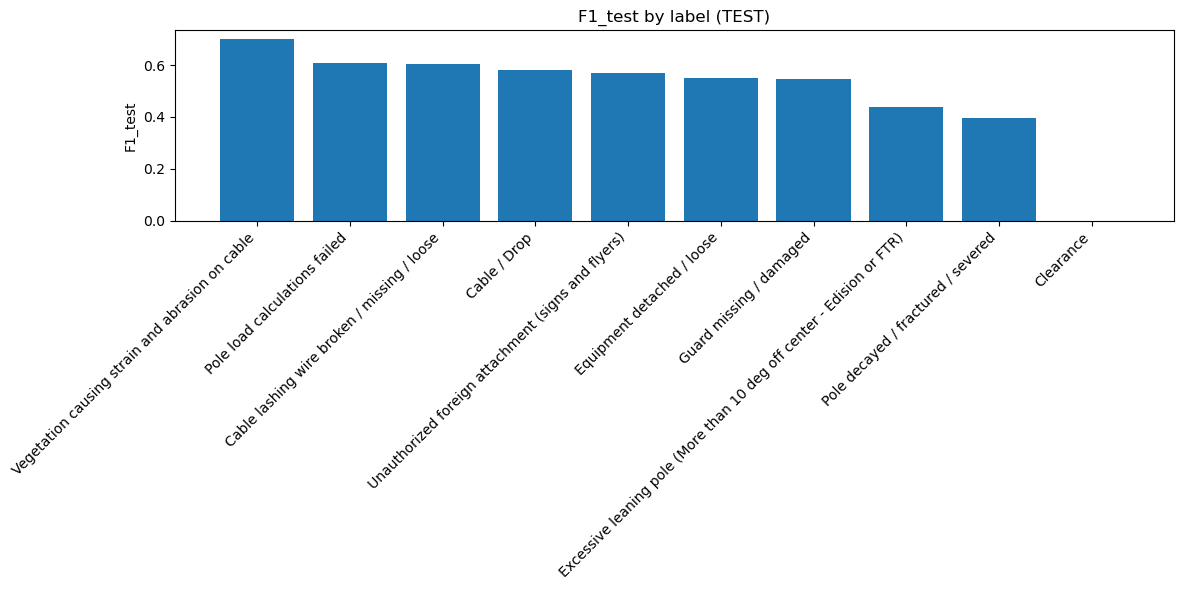

In [8]:
# === Per-label bar chart (AP or F1) → PNG in artifacts ===
import os
import pandas as pd
import matplotlib.pyplot as plt

ARTIFACT_DIR = os.environ.get("ARTIFACT_DIR", "./artifacts_v3_2")
REPORT_CSV   = f"{ARTIFACT_DIR}/per_label_report_v3_2.csv"

# Choose which metric to plot: "AP_test" or "F1_test"
METRIC = "F1_test"   # change to "AP_test" if you want AP instead

df = pd.read_csv(REPORT_CSV)

# Sort descending and (optionally) take top-N for readability
TOP_N = None   # set to e.g. 10 for top-10; leave as None for all
plot_df = df.sort_values(METRIC, ascending=False)
if TOP_N:
    plot_df = plot_df.head(TOP_N)

# Build the bar chart
plt.figure(figsize=(12, 6))
plt.bar(plot_df["label"], plot_df[METRIC])  # no explicit colors/styles per guidance
plt.ylabel(METRIC)
plt.title(f"{METRIC} by label (TEST)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

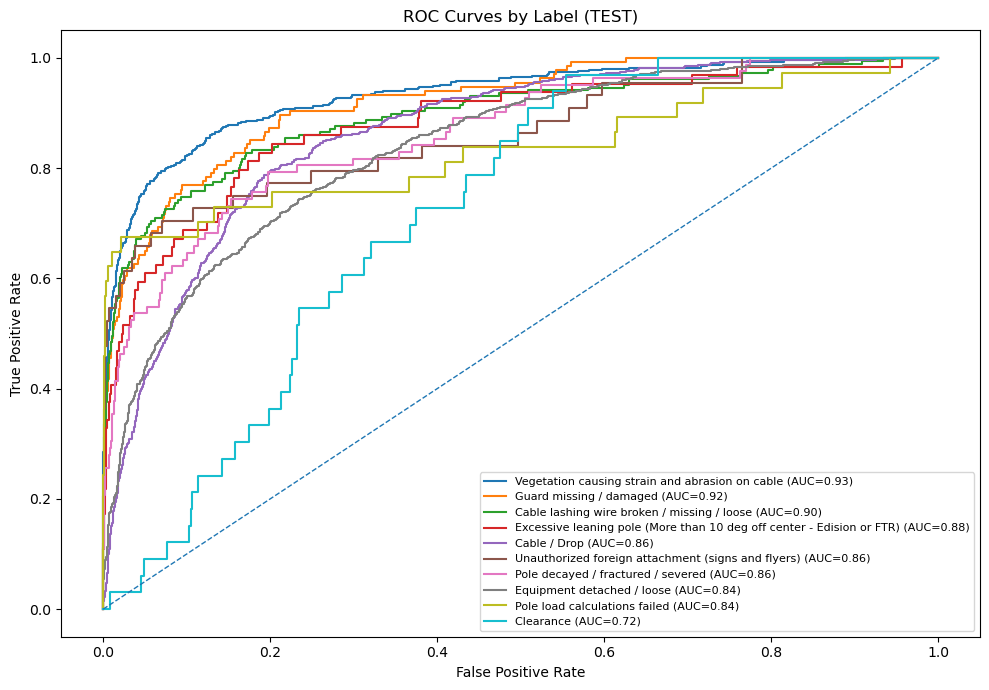

Saved ROC chart -> ./artifacts_v3_2/ROC_AUC_all_labels_v3_2.png


In [9]:
# === ROC curves by label (TEST) → single plot + PNG ===
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

ARTIFACT_DIR = os.environ.get("ARTIFACT_DIR", "./artifacts_v3_2")
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# ---------- 1) Get y_true / y_prob (TEST) ----------
def _load_arrays():
    # Prefer in-memory (common in your notebook after evaluation)
    if 'y_test_true' in globals() and 'y_test_prob' in globals():
        return np.asarray(y_test_true), np.asarray(y_test_prob)

    # Try saved .npy files if you exported them
    npy_true = os.path.join(ARTIFACT_DIR, "y_test_v3_2.npy")
    npy_prob = os.path.join(ARTIFACT_DIR, "fusion_test_probs_v3_2.npy")
    if os.path.exists(npy_true) and os.path.exists(npy_prob):
        return np.load(npy_true), np.load(npy_prob)

    # Last resort: compute from the current model + ds_test (your notebook defines _ensure_probs)
    if 'model' in globals() and 'ds_test' in globals():
        try:
            y_true, y_prob = _ensure_probs(model, ds_test)  # defined in your pipeline
            return y_true, y_prob
        except Exception as e:
            raise RuntimeError(f"Could not compute test probs via _ensure_probs: {e}")

    raise FileNotFoundError(
        "Need y_test_true/y_test_prob in memory, .npy files in ARTIFACT_DIR, "
        "or access to model+ds_test with _ensure_probs(..)."
    )

y_test_true, y_test_prob = _load_arrays()
assert y_test_true.shape == y_test_prob.shape, f"Shape mismatch: {y_test_true.shape} vs {y_test_prob.shape}"
N, L = y_test_true.shape

# ---------- 2) Label names ----------
labels_csv = os.path.join(ARTIFACT_DIR, "label_names_v3_2.csv")
if os.path.exists(labels_csv):
    label_names = pd.read_csv(labels_csv, header=None)[0].astype(str).tolist()
else:
    label_names = [f"Label {i}" for i in range(L)]
if len(label_names) != L:
    label_names = (label_names + [f"Label {i}" for i in range(L)])[:L]

# ---------- 3) Compute ROC for each label (skip labels with only one class present) ----------
curves = []
for j in range(L):
    yt = y_test_true[:, j]
    yp = y_test_prob[:, j]
    if len(np.unique(yt)) < 2:
        curves.append((j, None, np.nan))  # ROC needs both classes
        continue
    fpr, tpr, _ = roc_curve(yt, yp)
    roc_auc = auc(fpr, tpr)
    curves.append((j, (fpr, tpr), roc_auc))

# Sort legend order by AUC desc (NaNs last) for readability
curves_sorted = sorted(curves, key=lambda x: (-x[2] if x[2] == x[2] else float("inf")))

# ---------- 4) Plot all on one figure (no custom colors/styles) ----------
plt.figure(figsize=(10, 7))
plotted = 0
for j, ft, roc_auc in curves_sorted:
    if ft is None or roc_auc != roc_auc:
        continue
    fpr, tpr = ft
    plt.plot(fpr, tpr, label=f"{label_names[j]} (AUC={roc_auc:.2f})")
    plotted += 1

# Baseline (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=1)

plt.title("ROC Curves by Label (TEST)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
if plotted > 0:
    plt.legend(fontsize=8)
plt.tight_layout()

# ---------- 5) Save for deck ----------
out_png = os.path.join(ARTIFACT_DIR, "ROC_AUC_all_labels_v3_2.png")
plt.savefig(out_png, dpi=200)
plt.show()
print("Saved ROC chart ->", out_png)